In [1]:
#Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
def generate_data_matrix(samples, features): # declaration of the function
    """
        Generates a data matrix consisting of samples as rows and features as columns
        Parameters:
        
        Samples (int): Number of samples in the data
        Features (int): Feature dimension
        
        Returns:
        
        np.ndarray : A data matrix with dimensions (samples, features)
    
    """
    
    return np.random.rand(samples, features); # returns a np.ndarray with dimensions samples x features (data matrix)

generate_data_matrix(10,5) # A test case to check if it is working or not

array([[0.1570772 , 0.9247197 , 0.82016595, 0.92339666, 0.9383956 ],
       [0.90395757, 0.58744128, 0.49671672, 0.09712435, 0.60965729],
       [0.77119057, 0.53188929, 0.4353102 , 0.79835133, 0.4995772 ],
       [0.30953976, 0.53573467, 0.29122762, 0.59011853, 0.99471952],
       [0.61509204, 0.62678852, 0.47811158, 0.77167301, 0.04122561],
       [0.88072981, 0.2077619 , 0.13342808, 0.30981363, 0.65431625],
       [0.16016031, 0.13397008, 0.59760348, 0.02540523, 0.09715085],
       [0.03414282, 0.60486025, 0.01352769, 0.09257157, 0.87994679],
       [0.24029481, 0.21410659, 0.54812571, 0.137966  , 0.02862366],
       [0.72476244, 0.33157055, 0.90802217, 0.52342571, 0.2570008 ]])

We can observe that our data matrix has rows equal to the number of samples 

Similarly columns equal to feature dimension

#### Task(2): Define a function to create a dependent variable column t

Here we can also introduce another parameter to stimulate noise(Generated during measurement or other real-life reasons)

Parameters:
- Data matrix  (np.ndarray)
- Noise_Level (int) (with mean 0 and the level of variation linear to the noise level)
    
Output:
- Dependent column " t " (np.ndarray)

In [3]:
def dependent_column(x, w, w0, noise_level=0): # Function declaration
    """
        Generates a dependent variable with y = x*w + w0 with some noise if specified
        
        Parameters:
        
        x (np.ndarray) : An independent variable
        w (np.ndarray) : Weight vector
        w0 (np.ndarray) : bias
        Noise_level (int) : Noise addition variable which is essentially set to 0
        
        Returns:
        
        y (np.ndarray) : A dependent variable column with same dimensions as that of x
    
    """
    y = np.dot(x, w) + w0 + np.random.normal(0, noise_level)  # Calculating the dependent column
    return y # Returns the dependent column which in this case is also a linear regressing with bias estimate

In [4]:
x = generate_data_matrix(5,3) #Initialising Data_matrix
w = generate_data_matrix(3,1) #Initialising weights
w0 = generate_data_matrix(5,1) # Initialising biases
dependent_column(x,w,w0) # Demo test

array([[0.80549703],
       [1.09333272],
       [0.87904877],
       [1.11288683],
       [1.18651999]])

From above we can observe that we get a dependent variable column after using the function




#### Task(3)  Write a function to compute a linear regression estimate.

- Input: data matrix X and weight vector w

- Output: y

In [5]:
def linear_regression_est(X, w): # Funciton declaration
    """
    Calculates a linear regression estimate for given data matrix with weight vector
    
    Parameters:
    
    Data matrix X (np.ndarray) : Data from which estimate is made
    Weight vector w (np.ndarray) : Weights for each feature
    
    Return:
    
    Y (np.ndarray) : Estimate made
    """
    
    y = np.dot(X, w) # Calculate the estimate
    
    return y #returns the estimate

In [6]:
linear_regression_est(x,w) # Demo run if the function is working

array([[0.75564135],
       [0.85771091],
       [0.63873521],
       [0.54106588],
       [0.61327956]])

This function returns the linear estimates without any addition of biases



#### Task(4) Write a function to compute the mean square error of two vectors y and t.

- Input: Estimate vector: y(np.ndarray) and target values (np.ndarray)
- Output: the mean square error

In [7]:
def mse(y, t): # Decalration of the function
    """
    Calculates the mean square error for the given y vector with respect to x vector
    
    Parameters:
    
    y (np.ndarray) : the estimate vector
    t (np.ndarray) : Target vector
    
    Return:
    
    mse (int) : mean square error
    
    """
    m = y.shape[0]
    
    mse = np.mean(np.power((y - t), 2))/m # Calculating the mean
    
    return mse # Returning the output

In [8]:
t = dependent_column(x,w,w0) # Assuming this to be the target values
y = linear_regression_est(x,w) # Creating a estimate vector
mse(y, t) # Testing the mean square error function

0.03085350539964806

Defined function returns the mean square error value for given two vectors as observed above



#### Task(5) Write a function to estimate the weights of linear regression using pseudo-inverse, assuming L2 regularization:

- Input: X, t, and lambda

- Output: w, MSE, y

In [9]:
def est_wt_pinv_linearRegression_L2(X, t, Lambda = 0): # Initialization of the function
    """
    Estimate weights for linear regression using psuedo inverse (np.linalg.pin())
    
    Parameters:
    
    X (np.ndarray) : Training data matrix
    t (np.ndarray) : training target data
    Lambda (int) : Regularizations constant (L2)
    
    Returns:
    
    w (np.ndarray) : Weights 
    MSE (int) : mean square error
    y (np.ndarray) : Estimated target values
    
    """
    #Extracting shape of the input data matrix
    N = X.shape[0] 
    M = X.shape[1]
    
    X_cross = np.matmul(np.linalg.pinv(Lambda*np.identity(M) + np.matmul(X.T, X)), X.T) 
                                #calculating psuedo inverse while assuming L2 regularization
    
    wt = np.matmul(X_cross, t) #estimation of weights 
    y_hat = linear_regression_est(X, wt) # Estimated output
    MSE = mse(y_hat, t) # MeanSquareError
    return wt, MSE, y_hat #returns the ouput

In [10]:
wt = est_wt_pinv_linearRegression_L2(x, w0, 1)[0] # storing the weights produced in a variable
est_wt_pinv_linearRegression_L2(x, w0, 1) # desplaying the output from the function above

(array([[0.16703831],
        [0.04279054],
        [0.29054585]]),
 0.011831488711101571,
 array([[0.21007536],
        [0.26082538],
        [0.22438421],
        [0.21286369],
        [0.19857045]]))

We can see that MSE is very low.
Our output consists of: estimated weights, MSE, and estimated output

#### Task(6): Write a function to compute the gradient of MSE with respect to its weight vector.

- Input: X matrix, t vector, and w vector

* Output: gradient vector

In [11]:
def gradient_mse(X, t, wt): # Initialization of the function
    """
    Computes gradient vector of mse
    
    Parameters:
    
    X (np.ndarray): Data matrix
    t (np.ndarary): Target matrix
    wt (np.ndarray): Weight matrix
    
    Returns:
    
    gradient vector (np.ndarray): The gradient for mse algorithm
    
    """
    n = X.shape[0]
    m = X.shape[1]
    grad = np.zeros(m)
    for i in range(m):
        grad[i] = 1/n*np.sum(X*wt[i] - t) #calculate the gradient vector of mse
    grad = np.reshape(grad, (m,1))
    return grad # Returns the gradient vector

In [12]:
gradient_mse(x, w0, wt) #Testing above function

array([[-0.76653433],
       [-0.94206073],
       [-0.59205365]])

Above we get a gradient vector for the example taken above

#### Task(7): Write a function to compute L2 norm of a vector w passed as a numpy array. Exclude bias w0.

- Input: Lambda, wt vector
- Output: L2 norm

In [13]:
def l2_norm(wt, Lambda = 0):
    """
    Calculates the norm value for l2 regularization 
    
    Parameters:
    
    Lambda (int): Regularization constant
    wt (np.ndarray): Weight vector
    
    Returns:
    
    l2 norm (int): loss due to the weights, norm with l2
    
    """
    return (Lambda/2)*np.sum(np.power(wt, 2)) #Calculated sum for weights according to l2 regularization
    

In [14]:
l2_norm(1, wt).shape # Showing the output for the function defined above

(3, 1)

We can see that the loss dues to l2 regularization turns out to be small. When weights were estimated 
using psuedo inverse method. 

#### Task(8): Write a function to compute the gradient of L2 norm with respect to the weight vectors.

- Input: X matrix and w vector

- Output: gradient vector, where gradient with respect to w0 is 0.

In [15]:
def gradient_l2(X, wt, Lambda = 0):
    """
    Calculates the gradient vector for l2 regularization w.r.t. weight vectors
    
    Parameters:
    
    X (np.ndarray): Data_matrix
    wt (np.ndarray): Weight vector
    Lambda (int): Regualrization constant
    
    Returns:
    
    Gradient Vector (np.ndarray): Gradient vector of l2 w.r.t. weight vectors
    
    """
    dw = Lambda*np.absolute(wt) # Calculate gradient w.r.t. weights 
    
    return dw # Output
    

In [16]:
gradient_l2(x, wt, 1).shape #Testing

(3, 1)

Function gives the gradient vector as the output







#### Task(9): Write a function to compute L1 norm of a vector w passed as a numpy array. Exclude bias w0.

- Input: w, Lambda
- Output: L1 norm

In [17]:
def l1_norm(wt, Lambda = 0):
    """
    Calculates the norm value for L1 regularization
    
    Parameters:

    Lambda (int): Regularization constant
    wt (np.ndarray): Weight vector
    
    Returns:
    
    L1 norm (int): loss due to weights, norm with l1    
    """
    
    return (Lambda/2)*np.sum(np.absolute(wt)) #Returns the loss due to weights for l1 regularization



#### Task(10): Write a function to compute the gradient of L1 norm with respect to the weight vectors.

- Input: X matrix and w vector

- Output: gradient vector, where gradient with respect to w0 is 0.

In [18]:
def gradient_l1(X, wt, Lambda = 0):
    """
    Calculates gradient vector of l1 regularization w.r.t. the weight vector
    
    Parameters:
    
    X (np.ndarray): Data_matrix
    wt (np.ndarray): Weight vectors
    Lambda (int): Regularization constant
    
    Returns:
    
    Gradient vector: Gradient vector of L1 w.r.t. weight vectors
    
    """
    
    # for l1 regularization its gradient at zero is not defined therefore we will choose it to be zero at that value
    # As for other values it basically defines the direction of the decent
    # That is when wt > 0 it's +1 and otherwise -1
    dw = (Lambda/2) * np.sign(wt) # Gradient vector
    
    return dw # output

In [19]:
gradient_l1(x, wt, 1).shape # testing

(3, 1)

Here `np.sign(wt)` gives a sgn output which is the part which governs the direction of the descent



#### Task(11):  Write a function for a single update of weights of linear regression using gradient descent.
- Input: X, t, w, eta, lambda 2, lambda 1. Note that the weight of MSE will be 1

- Output: updated weight and updated MSE

In [20]:
def wt_update_linearRegression(X, t, wt, eta, Lambda_1 = 0, Lambda_2 = 0):
    """
    Updates the weights of the linear regression using gradient descnet
    
    Parameters:
    
    X (np.ndarray): Data_matrix
    t (np.ndarray): Target values
    eta (int): Defines the rate at which weights change
    Lambda_1 (int): Regularization constant for L1
    Lambda_2 (int): Regularization constant for L2
    
    Returns:
    
    wt_new: Newly updated weights
    MSE: New Mean Square Error
    
    """
    #Define gradient including all the costs
    gradient = gradient_mse(X, t, wt) + gradient_l1(X, wt, Lambda_1) + gradient_l2(X, wt, Lambda_2) 
    
    wt_new = wt - (eta* gradient) #Newly updated weights
    y_hat = np.dot(X, wt_new)
    mse_new = mse(y_hat, t) #Newly updated MSE
    
    
    return wt_new, mse_new #Output

In [22]:
q = generate_data_matrix(10,4)
wt = generate_data_matrix(4,1)
w0 = np.zeros((10, 1))
t = dependent_column(q,wt,w0, 1)

wt0, mse_ = wt_update_linearRegression(q, t, wt, 0.1, 1, 1)

mse_

0.1392455017460703

The output consists of updated weights and new MSE with respect to weights


#### Task(12): Write a function to estimate the weights of linear regression using gradient descent.

- Inputs: X, t, lambda2 (default 0), lambda1 (default 0), eta, max_iter, min_change_NRMSE

- Output: Final w, final RMSE normalized with respect to variance of t.

- Stopping criteria: Either max_iter has been reached, or the normalized RMSE does not change by more than min_change_NRMSE

In [22]:
def est_WeightsLinearRegression(X, t, eta, max_iter, min_change_NRMSE, Lambda_2 = 0, Lambda_1 = 0):
    """
    Estimates the optimum weights for the given data set with respect to given target data. While following L2, L1 
    regularization if given. While moving at a rate of learning being eta.
    
    This weight change is carried out until maximum iterations (max_iter) are reached or until change in NRMSE is less than
    min_change_NRMSE
    
    Parameters:
    
    X (np.ndarray): Data matrix
    t (np.ndarray): Target values
    Lambda_2 (int) : Regularization constant of L2 (Default value = 0)
    Lambda_1 (int) : Regularization constant of L1 (Default value = 0)
    eta (int) : Learning rate
    max_iter (int): Maximum number of iteration that this model will carry out
    min_change_NRMSE (int): If the change in NRMSE is smaller than this than loop will stop
    
    Returns:
    
    w (np.ndarray) : Estimates of weights for the given specifications
    NRMSE (int): RMSE normalized with respect to variance of t    
    
    """
    N = X.shape[1] #Number of features
    M = X.shape[0] #Number of samples
    #wt = np.zeros((N,1)) #Initialization of weight vector
    wt = generate_data_matrix(N,1)
    mean_t = max(t) - min(t)
    NRMSE = min_change_NRMSE + 10
    NRMSE_new = 0
    for i in range(max_iter): #Loop initialization
        wt0, MSE = wt_update_linearRegression(X, t, wt, eta, Lambda_1, Lambda_2) #Calculation of new weights and mse value

        NRMSE_new = np.sqrt(MSE) / mean_t #New NRMSE value
        NRMSE_change = NRMSE - NRMSE_new

        NRMSE = NRMSE_new
        np.copyto(wt, wt0)

        if(np.absolute(NRMSE_change) < min_change_NRMSE): #Checking if NRMSE is less than or equal to given min value
            print("At iteration", i, "min_change_NRMSE is achieved")
            return wt, NRMSE # Returning if the above statement is true
        iterCheck = max_iter / 10
        if(i % iterCheck == 0):
            print("Iteration", i, "Has been completed with NRMSE as:", NRMSE)
        
    #np.reshape(wt,(N,1))
    return wt, NRMSE

In [25]:
q = generate_data_matrix(10,4)
wt = generate_data_matrix(4,1)
w0 = np.zeros((10, 1))
t = dependent_column(q,wt,w0, 1)
est_WeightsLinearRegression(q, t, 0.0001, 100, 0.0005)

Iteration 0 Has been completed with NRMSE as: [0.11748713]
At iteration 1 min_change_NRMSE is achieved


(array([[0.7086997 ],
        [0.66160557],
        [0.06447286],
        [0.10585666]]),
 array([0.11724174]))

We can see the progression of our linear regression estimate along with NRMSE at that perticular iteration.
Final output consists of estimated weights along with NRMSE value for that perticular value



#### TASK(13):  Run multiple experiments (with different random seeds) for, plot the results of (box plots), and comment on the trends and potential reasons for the following relations:

- Training and validation NRMSE obtained using pseudo inverse with number of training samples 

- Training and validation NRMSE obtained using pseudo inverse with number of variables 

- Training and validation NRMSE obtained using pseudo inverse with noise variance 

- Training and validation NRMSE obtained using pseudo inverse with w0 

- Training and validation NRMSE obtained using pseudo inverse with lambda2 

- Time taken to solve pseudo inverse with number of samples and number of variables and its breaking points 

- Training and validation NRMSE obtained using gradient descent with max_iter 

- Training and validation NRMSE obtained using gradient descent with eta 

- Time taken to solve gradient descent with number of samples and number of variables and its breaking points 

- Time taken to solve gradient descent with number of variables and its breaking point 

- Training and validation NRMSE and number of nearly zero weights obtained using gradient descent with lambda2 

- Training and validation NRMSE and number of nearly zero weights obtained using gradient descent with lambda1 

- Training and validation NRMSE for optimal lambda2 with noise variance

- Training and validation NRMSE for optimal lambda1 with noise variance 

- Experiment (f) but, this time with number of training samples and number of variables

- Write your overall learning points by doing entire assignment. 

- Quote your references, including roll numbers of fellow students with whom you discussed. Be specific about which part was inspired by what source or which friend.

In [25]:
## NRMSE for psuedo inverse with respect to number of training samples 

#Initializing variables 

wt_final = [] 
NRMSE_train = [[]]
t_hat = [[]]
NRMSE_val = [[]]

sample = 10 #Starting sample value


for i in range(6): #Loop over different samples
    seedList = range(11,22) #seed list over which we will be generating values

    
    for seed in seedList: #Loop over different seeds
    
        np.random.seed(seed)#stating a constant random seed

        #Synthesis of data
        q = generate_data_matrix(sample,2)
        wt = generate_data_matrix(2,1)
        w0 = np.zeros((sample, 1))
        t = dependent_column(q,wt,w0)

        #Splitting data into training and validation (70% to 30% ratio for tain and validation respectively)
        q_train, q_val, q_shape = np.split(q, [int(0.7*sample), int(sample)])
        t_train, t_val, t_shape = np.split(t, [int(0.7*sample), int(sample)])

        #estimating weights
        wt_final, MSE_new, y_hat_new = est_wt_pinv_linearRegression_L2(q_train, t_train) #Using psuedo inverse linearRegression
        mse_mean = max(y_hat_new) - min(y_hat_new) #Generating value for normalizing RMSE
        NRMSE_new = np.sqrt(MSE_new)/ mse_mean #NRMSE
        
        
        NRMSE_train[i] = np.append(NRMSE_train[i], NRMSE_new) #Appending values for NRMSE_train for different seeds
        
        #Validation of estimates
        y_hat_new = linear_regression_est(q_val, wt_final) #linearRegression estimate on validation data
        mse_mean = max(y_hat_new) - min(y_hat_new) #Generating value for normalizing RMSE
        MSE_new = mse(y_hat_new, t_val) #MSE
        NRMSE_new = np.sqrt(MSE_new)/ mse_mean #NRMSE
        
        
        NRMSE_val[i] = np.append(NRMSE_val[i], NRMSE_new) #Appending values for NRMSE_val for different seeds
        
        
    NRMSE_val.append([]) #Creating a different column for different samples value (Val)   
    NRMSE_train.append([]) #Creating a different column for different samples value (Train)
    sample = sample*10 #Increasing the number of samples on a log_10 scale

Let's check in what way does NRSME_train vary with respect to the number of samples

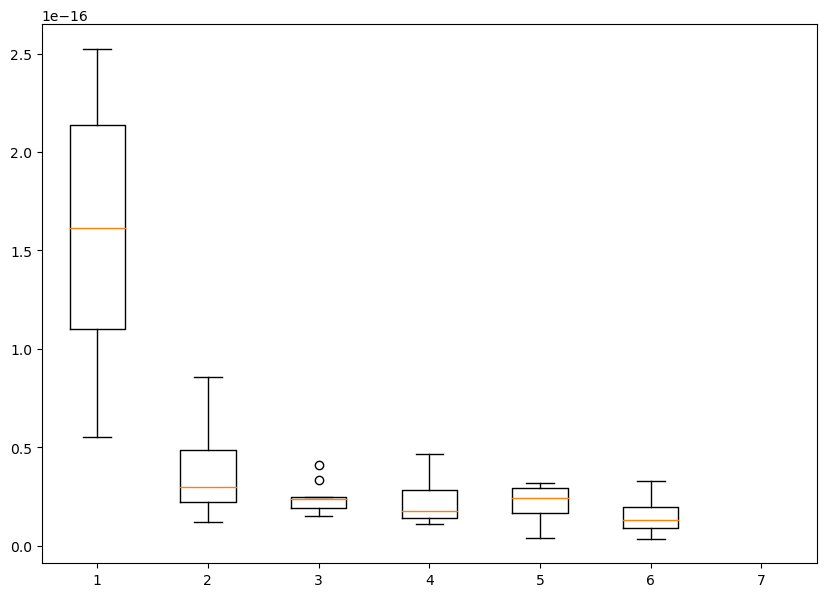

In [26]:
fig = plt.figure(figsize =(10, 7)) #Initializing the size of the figure
 
# Creating plot
plt.boxplot(NRMSE_train)
 
# show plot
plt.show()

From the graph we can see that NRMSE for training data tends to decrease exponentially. 

Now lets check for validation data as well:

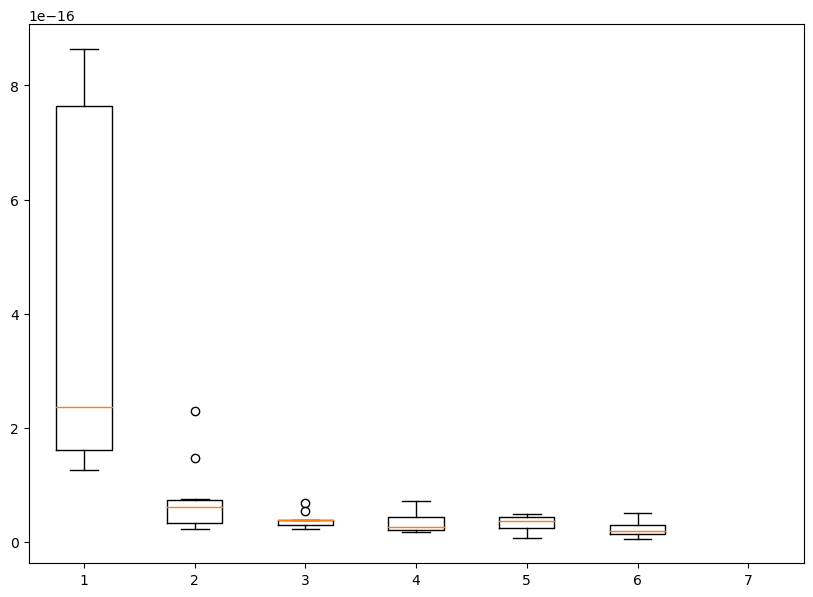

In [27]:
fig = plt.figure(figsize =(10, 7)) #Initializing the size of the figure
 
# Creating plot
plt.boxplot(NRMSE_val)
 
# show plot
plt.show()


We can see that with increase in samples there is an exponential decline in both Validation data and Training data.

Therefore, It can be concluded that more data is always better!






Now let's check the effects of features and how they influence NRMSE:

In [28]:
## NRMSE for psuedo inverse with respect to number of features 

#Initializing variables
wt_final = []
NRMSE_train = [[]]
t_hat = [[]]
NRMSE_val = [[]]
i = 0


for variables in range(5, 100, 5): #Loop over different samples
    seedList = range(11,22) #seed list over which we will be generating values

    
    for seed in seedList: #Loop over different seeds
    
        np.random.seed(seed)#stating a constant random seed

        #Synthesis of data
        q = generate_data_matrix(5000,variables)
        wt = generate_data_matrix(variables,1)
        w0 = np.zeros((5000, 1))
        t = dependent_column(q,wt,w0)

        #Splitting data into training and validation (70% to 30% ratio for tain and validation respectively)
        q_train, q_val, q_shape = np.split(q, [int(0.7*5000), int(5000)])
        t_train, t_val, t_shape = np.split(t, [int(0.7*5000), int(5000)])

        #estimating weights
        wt_final, MSE_new, y_hat_new = est_wt_pinv_linearRegression_L2(q_train, t_train) #Using psuedo inverse linearRegression
        mse_mean = max(y_hat_new) - min(y_hat_new) #Generating value for normalizing RMSE
        NRMSE_new = np.sqrt(MSE_new)/ mse_mean #NRMSE
        
        
        NRMSE_train[i] = np.append(NRMSE_train[i], NRMSE_new) #Appending values for NRMSE_train for different seeds
        
        #Validation of estimates
        y_hat_new = linear_regression_est(q_val, wt_final) #linearRegression estimate on validation data
        mse_mean = max(y_hat_new) - min(y_hat_new) #Generating value for normalizing RMSE
        
        MSE_new = mse(y_hat_new, t_val) #MSE
        NRMSE_new = np.sqrt(MSE_new)/ mse_mean #NRMSE
        
        
        NRMSE_val[i] = np.append(NRMSE_val[i], NRMSE_new) #Appending values for NRMSE_val for different seeds
        
        
    NRMSE_val.append([]) #Creating a different column for different samples value (Val)   
    NRMSE_train.append([]) #Creating a different column for different samples value (Train)
    i += 1 #Increasing the number of samples on a log_10 scale

As for the implementation of the code. It is pretty much the same as before only that we are iterating over variables instead of number of samples.

Here number of sample is 5000 for each case.

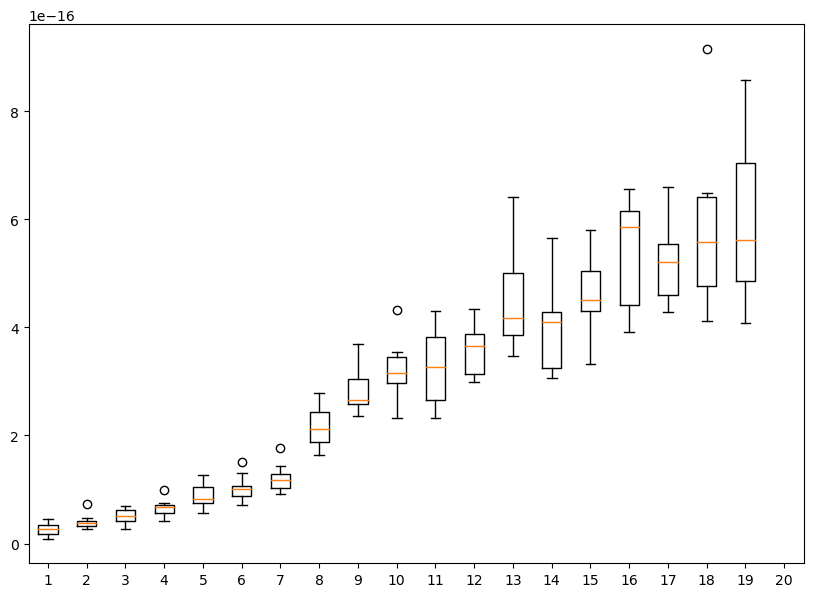

In [29]:
fig = plt.figure(figsize =(10, 7)) #Initializing the size of the figure
 
# Creating plot
plt.boxplot(NRMSE_train)
 
# show plot
plt.show()

It is clear that NRMSE increases consistently for training data with increase in features.

Lets check how this holds for validation data:

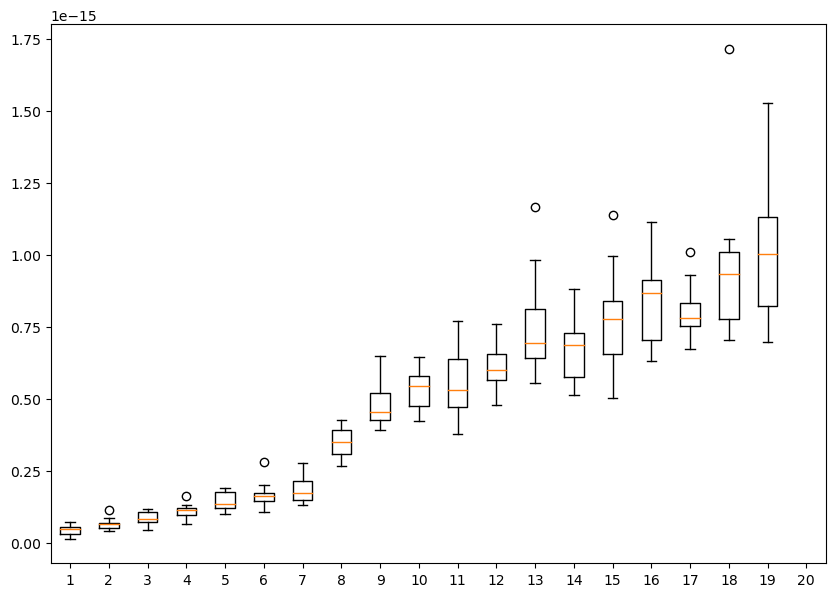

In [30]:
fig = plt.figure(figsize =(10, 7)) #Initializing the size of the figure
 
# Creating plot
plt.boxplot(NRMSE_val)
 
# show plot
plt.show()

It is clear that more feature causes NRMSE's variation to decrease consistantly. Only to a certain extent 

Therefore, we can conclude that more features are not always a good idea but one should be mindfull of all the trade-offs with it. Highly correlated features with respect to the target value are good for the model

In [31]:
##Noise 

#Initializing variables
wt_final = []
NRMSE_train = [[]]
t_hat = [[]]
NRMSE_val = [[]]
i = 0


for noise in range(0, 5, 1): #Loop over different samples
    seedList = range(11,22) #seed list over which we will be generating values

    
    for seed in seedList: #Loop over different seeds
    
        np.random.seed(seed)#stating a constant random seed

        #Synthesis of data
        q = generate_data_matrix(5000,45)
        wt = generate_data_matrix(45,1)
        w0 = np.zeros((5000,1))
        t = dependent_column(q,wt,w0, noise)

        #Splitting data into training and validation (70% to 30% ratio for tain and validation respectively)
        q_train, q_val, q_shape = np.split(q, [int(0.7*5000), int(5000)])
        t_train, t_val, t_shape = np.split(t, [int(0.7*5000), int(5000)])

        #estimating weights
        wt_final, MSE_new, y_hat_new = est_wt_pinv_linearRegression_L2(q_train, t_train) #Using psuedo inverse linearRegression
        mse_mean = max(y_hat_new) - min(y_hat_new) #Generating value for normalizing RMSE
        NRMSE_new = np.sqrt(MSE_new)/ mse_mean #NRMSE
        
        
        NRMSE_train[i] = np.append(NRMSE_train[i], NRMSE_new) #Appending values for NRMSE_train for different seeds
        
        #Validation of estimates
        y_hat_new = linear_regression_est(q_val, wt_final) #linearRegression estimate on validation data
        mse_mean = max(y_hat_new) - min(y_hat_new) #Generating value for normalizing RMSE
        
        MSE_new = mse(y_hat_new, t_val) #MSE
        NRMSE_new = np.sqrt(MSE_new)/ mse_mean #NRMSE
        
        
        NRMSE_val[i] = np.append(NRMSE_val[i], NRMSE_new) #Appending values for NRMSE_val for different seeds
        
        
    NRMSE_val.append([]) #Creating a different column for different samples value (Val)   
    NRMSE_train.append([]) #Creating a different column for different samples value (Train)
    i += 1 #Increasing the number of samples on a log_10 scale

Above code changes variance of noise with each iteration

We can see the boxplot for the same below:

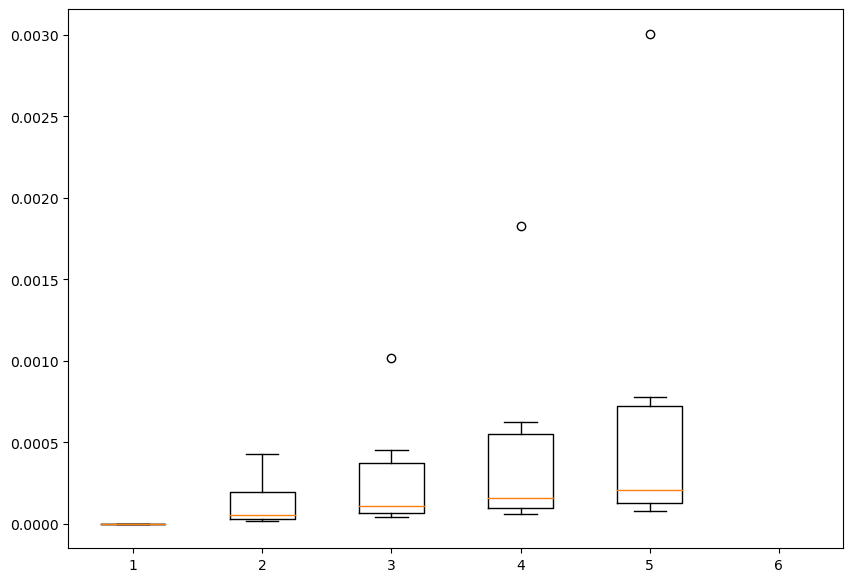

In [32]:
fig = plt.figure(figsize =(10, 7)) #Initializing the size of the figure
 
# Creating plot
plt.boxplot(NRMSE_train)
 
# show plot
plt.show()

With increase in variance NRMSE also increases which is intuitively correct. 
As this decreases consistancy of the data causing the model to be more prone to make errors

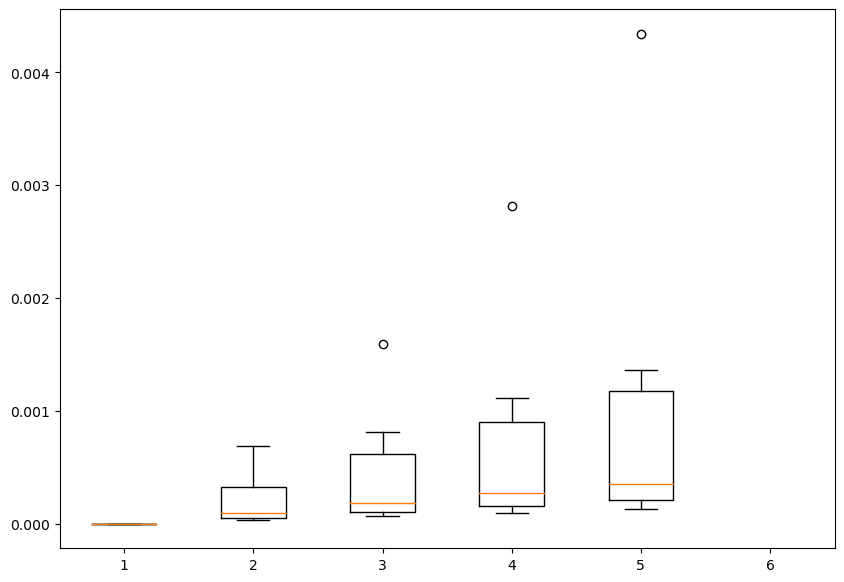

In [33]:
fig = plt.figure(figsize =(10, 7)) #Initializing the size of the figure
 
# Creating plot
plt.boxplot(NRMSE_val)
 
# show plot
plt.show()

The same trend is seen in validation data as well

Therefore, we can assume that noise in the data is not appreciated and can cause more errors.

In [34]:
##Adding bias

#Initializing variables
wt_final = []
NRMSE_train = [[]]
t_hat = [[]]
NRMSE_val = [[]]
i = 0


for bias in range(0, 10, 1): #Loop over different samples
    seedList = range(11,22) #seed list over which we will be generating values

    
    for seed in seedList: #Loop over different seeds
    
        np.random.seed(seed)#stating a constant random seed

        #Synthesis of data
        q = generate_data_matrix(5000,45)
        wt = generate_data_matrix(45,1)
        w0 = bias*generate_data_matrix(5000,1)
        t = dependent_column(q,wt,w0, noise)

        #Splitting data into training and validation (70% to 30% ratio for tain and validation respectively)
        q_train, q_val, q_shape = np.split(q, [int(0.7*5000), int(5000)])
        t_train, t_val, t_shape = np.split(t, [int(0.7*5000), int(5000)])

        #estimating weights
        wt_final, MSE_new, y_hat_new = est_wt_pinv_linearRegression_L2(q_train, t_train) #Using psuedo inverse linearRegression
        mse_mean = max(y_hat_new) - min(y_hat_new) #Generating value for normalizing RMSE
        NRMSE_new = np.sqrt(MSE_new)/ mse_mean #NRMSE
        
        
        NRMSE_train[i] = np.append(NRMSE_train[i], NRMSE_new) #Appending values for NRMSE_train for different seeds
        
        #Validation of estimates
        y_hat_new = linear_regression_est(q_val, wt_final) #linearRegression estimate on validation data
        mse_mean = max(y_hat_new) - min(y_hat_new) #Generating value for normalizing RMSE
        
        MSE_new = mse(y_hat_new, t_val) #MSE
        NRMSE_new = np.sqrt(MSE_new)/ mse_mean #NRMSE
        
        
        NRMSE_val[i] = np.append(NRMSE_val[i], NRMSE_new) #Appending values for NRMSE_val for different seeds
        
        
    NRMSE_val.append([]) #Creating a different column for different samples value (Val)   
    NRMSE_train.append([]) #Creating a different column for different samples value (Train)
    i += 1 #Increasing the number of samples on a log_10 scale

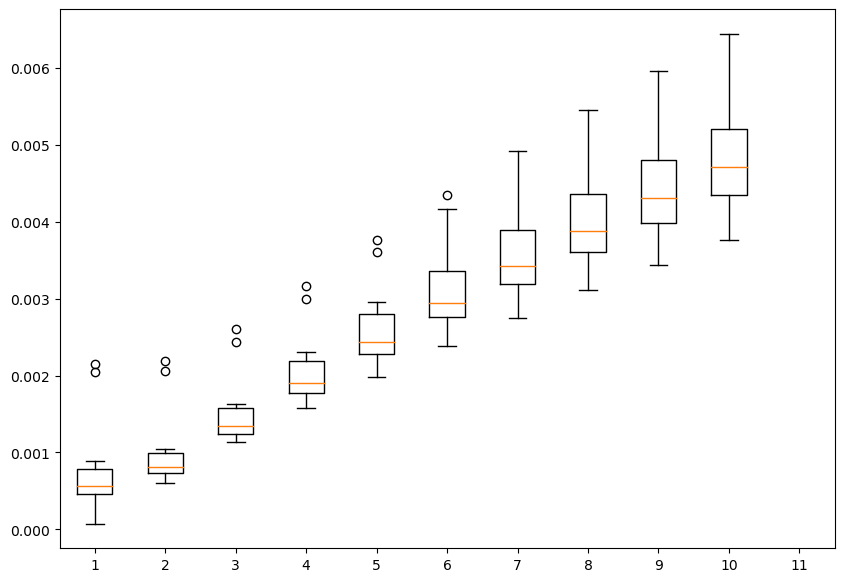

In [35]:
fig = plt.figure(figsize =(10, 7)) #Initializing the size of the figure
 
# Creating plot
plt.boxplot(NRMSE_train)
 
# show plot
plt.show()

With increase in bias there is a clear increase in NRMSE for psuedo inverse linear Regression.

Let's see for validation data as well:

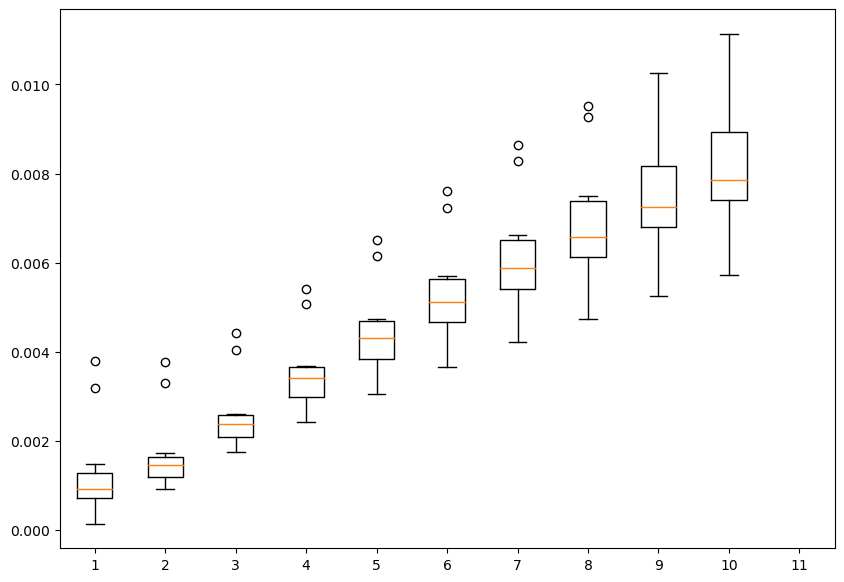

In [36]:
fig = plt.figure(figsize =(10, 7)) #Initializing the size of the figure
 
# Creating plot
plt.boxplot(NRMSE_val)
 
# show plot
plt.show()

A simillar nature is seen for validation data as well.

Therefore, for psuedo inverse linear regression model it works better if there is not inherent bias within dependent matrix

In [26]:
## Lambda

#Initializing variables
wt_final = []
NRMSE_train = [[]]
t_hat = [[]]
NRMSE_val = [[]]
i = 0


for L2 in range(-5, 10, 1): #Loop over different lambda
    seedList = range(11,22) #seed list over which we will be generating values

    
    for seed in seedList: #Loop over different seeds
    
        np.random.seed(seed)#stating a constant random seed

        #Synthesis of data
        q = generate_data_matrix(5000,45)
        wt = generate_data_matrix(45,1)
        w0 = np.zeros((5000,1))
        t = dependent_column(q,wt,w0, 0.0001) #with 0.1 variance

        #Splitting data into training and validation (70% to 30% ratio for tain and validation respectively)
        q_train, q_val, q_shape = np.split(q, [int(0.7*5000), int(5000)])
        t_train, t_val, t_shape = np.split(t, [int(0.7*5000), int(5000)])

        #estimating weights
        wt_final, MSE_new, y_hat_new = est_wt_pinv_linearRegression_L2(q_train, t_train, L2/100) #Using psuedo inverse linearRegression
        mse_mean = max(y_hat_new) - min(y_hat_new) #Generating value for normalizing RMSE
        NRMSE_new = np.sqrt(MSE_new)/ mse_mean #NRMSE
        
        
        NRMSE_train[i] = np.append(NRMSE_train[i], NRMSE_new) #Appending values for NRMSE_train for different seeds
        
        #Validation of estimates
        y_hat_new = linear_regression_est(q_val, wt_final) #linearRegression estimate on validation data
        mse_mean = max(y_hat_new) - min(y_hat_new) #Generating value for normalizing RMSE
        
        MSE_new = mse(y_hat_new, t_val) #MSE
        NRMSE_new = np.sqrt(MSE_new)/ mse_mean #NRMSE
        
        
        NRMSE_val[i] = np.append(NRMSE_val[i], NRMSE_new) #Appending values for NRMSE_val for different seeds
        
        
    NRMSE_val.append([]) #Creating a different column for different samples value (Val)   
    NRMSE_train.append([]) #Creating a different column for different samples value (Train)
    i += 1 #Increasing the number of samples on a log_10 scale

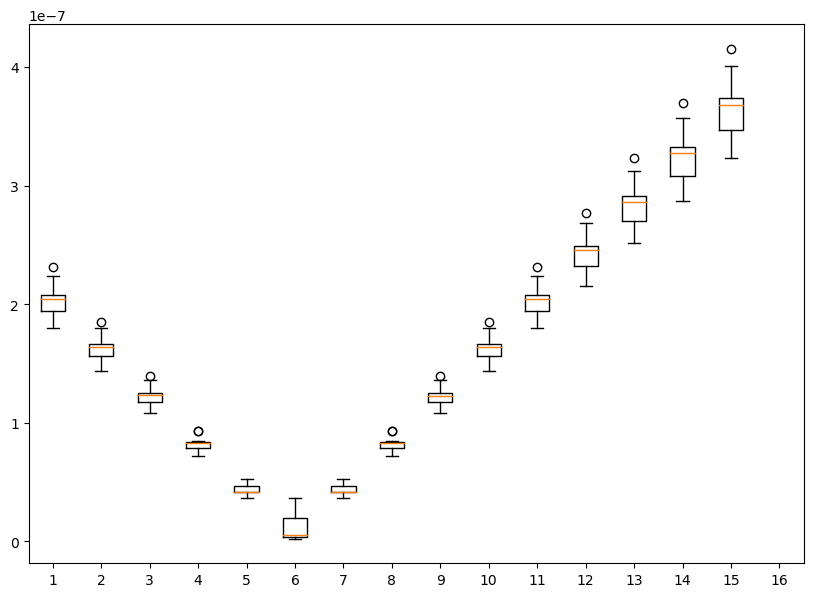

In [28]:
fig = plt.figure(figsize =(10, 7)) #Initializing the size of the figure
 
# Creating plot
plt.boxplot(NRMSE_train)
 
# show plot
plt.show()

Boxplot for training data with variation of lambda

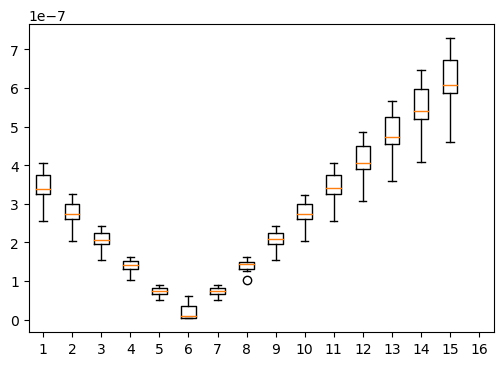

In [31]:
fig = plt.figure(figsize =(6, 4)) #Initializing the size of the figure
 
# Creating plot
plt.boxplot(NRMSE_val)
 
# show plot
plt.show()

With increase in lambda NRMSE also increases for both Validation and training data. But there is a significant decrease in variation in NRMSE i.e more consistancy.
Therefore, Lambda should be close to zero as to not influence the model enough but also significant enough to avoid overfitting

In [32]:
#Initializing variables 
Time = [[]]
wt_final = [] 
NRMSE_train = [[]]
t_hat = [[]]
NRMSE_val = [[]]
Initial_time = time.time()
sample = 10 #Starting sample value


for i in range(8): #Loop over different samples
    seedList = range(11,22) #seed list over which we will be generating values

    
    for seed in seedList: #Loop over different seeds
        start = time.time()
        np.random.seed(seed)#stating a constant random seed

        #Synthesis of data
        q = generate_data_matrix(sample,2)
        wt = generate_data_matrix(2,1)
        w0 = np.zeros((sample, 1))
        t = dependent_column(q,wt,w0)

        #Splitting data into training and validation (70% to 30% ratio for tain and validation respectively)
        q_train, q_val, q_shape = np.split(q, [int(0.7*sample), int(sample)])
        t_train, t_val, t_shape = np.split(t, [int(0.7*sample), int(sample)])

        #estimating weights
        wt_final, MSE_new, y_hat_new = est_wt_pinv_linearRegression_L2(q_train, t_train) #Using psuedo inverse linearRegression
        
        end = time.time()
        time_new = end - start
        Time[i] = np.append(Time[i], time_new)
        #print(end - start, "\n\n")
        
        
    Time.append([]) #Creating a different column for time
    sample = sample*5 #Increasing the number of samples on a log_10 scale
    

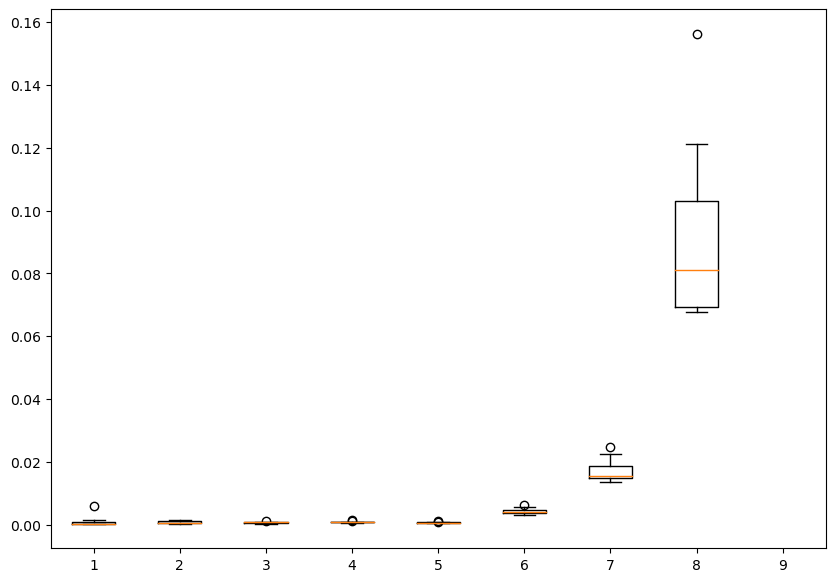

In [33]:
fig = plt.figure(figsize =(10, 7)) #Initializing the size of the figure
 
# Creating plot
plt.boxplot(Time)
 
# show plot
plt.show()

With increase in samples there is a clear increase in time taken. Which turns out to be of complexity O(n^3)

In [43]:
#sample = 65000000
#seedList = range(11, 22)
#for seed in seedList: #Loop over different seeds
        start = time.time()
        np.random.seed(seed)#stating a constant random seed

        #Synthesis of data
        q = generate_data_matrix(sample,2)
        wt = generate_data_matrix(2,1)
        w0 = np.zeros((sample, 1))
        t = dependent_column(q,wt,w0)

        #Splitting data into training and validation (70% to 30% ratio for tain and validation respectively)
        q_train, q_val, q_shape = np.split(q, [int(0.7*sample), int(sample)])
        t_train, t_val, t_shape = np.split(t, [int(0.7*sample), int(sample)])

        #estimating weights
        wt_final, MSE_new, y_hat_new = est_wt_pinv_linearRegression_L2(q_train, t_train) #Using psuedo inverse linearRegression
        
        end = time.time()
        #time_new = end - start
        #Time[i] = np.append(Time[i], time_new)
        print(end - start, "\n\n")

IndentationError: unexpected indent (1437537600.py, line 4)

The above case is the breakdown point

In [167]:
#est_WeightsLinearRegression(X, t, eta, max_iter, min_change_NRMSE, Lambda_2 = 0, Lambda_1 = 0)


#Initializing variables
wt_final = []
NRMSE_train = [[]]
t_hat = [[]]
NRMSE_val = [[]]
i = 0


for maxiter in range(10, 400, 10): #Loop over different lambda
    seedList = range(11,22) #seed list over which we will be generating values

    
    for seed in seedList: #Loop over different seeds
    
        np.random.seed(seed)#stating a constant random seed

        #Synthesis of data
        q = generate_data_matrix(500,45)
        wt = generate_data_matrix(45,1)
        w0 = np.zeros((500,1))
        t = dependent_column(q,wt,w0, 0.007) #with 0.1 variance

        #Splitting data into training and validation (70% to 30% ratio for tain and validation respectively)
        q_train, q_val, q_shape = np.split(q, [int(0.7*500), int(500)])
        t_train, t_val, t_shape = np.split(t, [int(0.7*500), int(500)])

        #estimating weights
        wt_final, MSE_new = est_WeightsLinearRegression(q_train, t_train, 0.0001, maxiter, 0.005) #Using psuedo inverse linearRegression
        y_hat_new = linear_regression_est(q_train, wt_final)      
        mse_mean = max(y_hat_new) - min(y_hat_new) #Generating value for normalizing RMSE
        NRMSE_new = np.sqrt(MSE_new)/ mse_mean #NRMSE
        
        
        NRMSE_train[i] = np.append(NRMSE_train[i], NRMSE_new) #Appending values for NRMSE_train for different seeds
        
        #Validation of estimates
        y_hat_new = linear_regression_est(q_val, wt_final) #linearRegression estimate on validation data
        mse_mean = max(y_hat_new) - min(y_hat_new) #Generating value for normalizing RMSE
        
        MSE_new = mse(y_hat_new, t_val) #MSE
        NRMSE_new = np.sqrt(MSE_new)/ mse_mean #NRMSE
        
        
        NRMSE_val[i] = np.append(NRMSE_val[i], NRMSE_new) #Appending values for NRMSE_val for different seeds
        
        
    NRMSE_val.append([]) #Creating a different column for different samples value (Val)   
    NRMSE_train.append([]) #Creating a different column for different samples value (Train)
    i += 1 #Increasing the number of samples on a log_10 scale

Iteration 0 Has been completed with NRMSE as: [0.00675965]
At iteration 1 min_change_NRMSE is achieved
Iteration 0 Has been completed with NRMSE as: [0.01503746]
Iteration 1 Has been completed with NRMSE as: [0.0231272]
Iteration 2 Has been completed with NRMSE as: [0.03147669]
Iteration 3 Has been completed with NRMSE as: [0.03991082]
Iteration 4 Has been completed with NRMSE as: [0.04837512]
Iteration 5 Has been completed with NRMSE as: [0.05684744]
Iteration 6 Has been completed with NRMSE as: [0.06531716]
Iteration 7 Has been completed with NRMSE as: [0.07377857]
Iteration 8 Has been completed with NRMSE as: [0.08222834]
Iteration 9 Has been completed with NRMSE as: [0.09066441]
Iteration 0 Has been completed with NRMSE as: [0.0159311]
Iteration 1 Has been completed with NRMSE as: [0.02483715]
Iteration 2 Has been completed with NRMSE as: [0.03401358]
Iteration 3 Has been completed with NRMSE as: [0.04327489]
Iteration 4 Has been completed with NRMSE as: [0.05256486]
Iteration 5 Ha

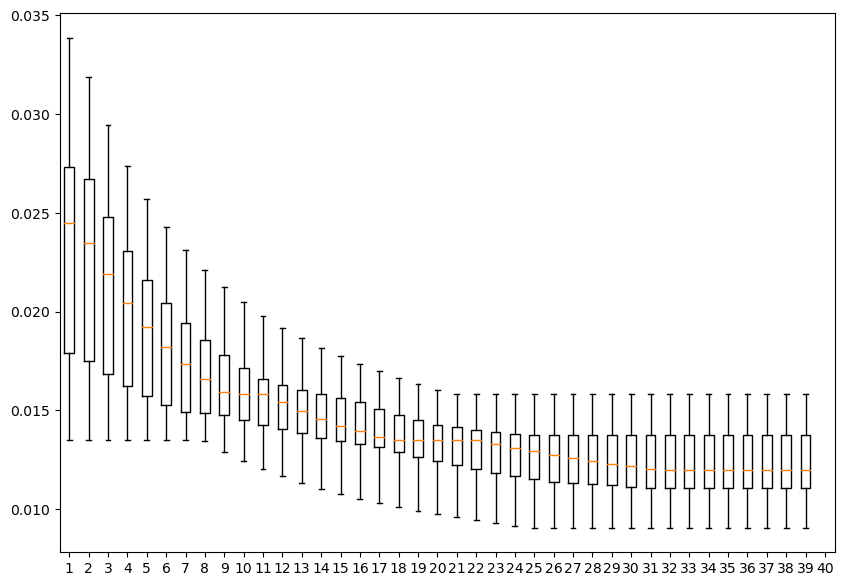

In [168]:
fig = plt.figure(figsize =(10, 7)) #Initializing the size of the figure
 
# Creating plot
plt.boxplot(NRMSE_train)
 
# show plot
plt.show()

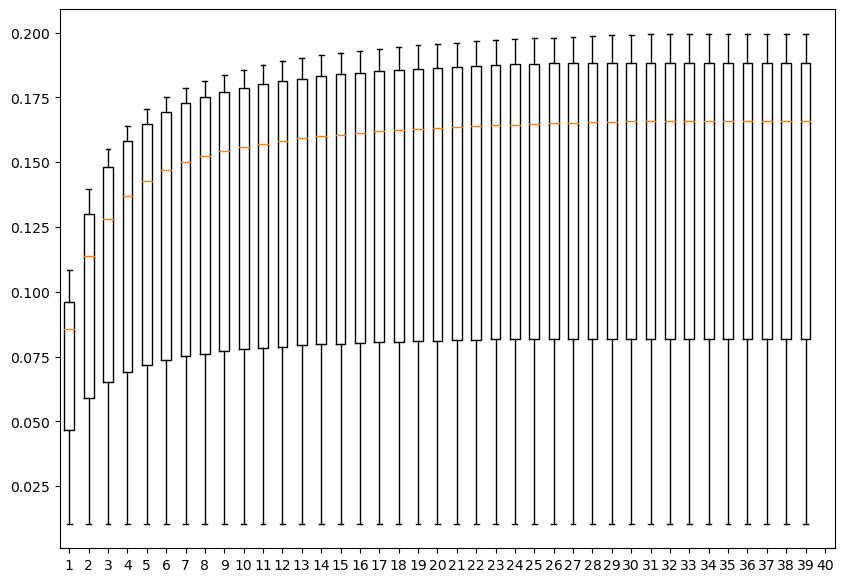

In [169]:
fig = plt.figure(figsize =(10, 7)) #Initializing the size of the figure
 
# Creating plot
plt.boxplot(NRMSE_val)
 
# show plot
plt.show()

With increase in max_iter there is decrease in training data's NRMSE while increase in validation data's 
NRMSE as this a case for overfitting

In [51]:
#est_WeightsLinearRegression(X, t, eta, max_iter, min_change_NRMSE, Lambda_2 = 0, Lambda_1 = 0)


#Initializing variables
wt_final = []
NRMSE_train = [[]]
t_hat = [[]]
NRMSE_val = [[]]
i = 0

for EEta in range(1, 60, 1): #Loop over different lambda
    seedList = range(11,22) #seed list over which we will be generating values


    for seed in seedList: #Loop over different seeds

        np.random.seed(seed)#stating a constant random seed

        #Synthesis of data
        q = generate_data_matrix(500,25)
        wt = generate_data_matrix(25,1)
        w0 = np.zeros((500,1))
        t = dependent_column(q,wt,w0, 0.01) #with 0.1 variance

        #Splitting data into training and validation (70% to 30% ratio for tain and validation respectively)
        q_train, q_val, q_shape = np.split(q, [int(0.7*500), int(500)])
        t_train, t_val, t_shape = np.split(t, [int(0.7*500), int(500)])

        #estimating weights
        wt_final, MSE_new = est_WeightsLinearRegression(q_train, t_train, EEta/100000, 150, 0.05) #Using linearRegression
        y_hat_new = linear_regression_est(q_train, wt_final)      
        mse_mean = max(y_hat_new) - min(y_hat_new) #Generating value for normalizing RMSE
        NRMSE_new = np.sqrt(MSE_new)/ mse_mean #NRMSE


        NRMSE_train[i] = np.append(NRMSE_train[i], NRMSE_new) #Appending values for NRMSE_train for different seeds

        #Validation of estimates
        y_hat_new = linear_regression_est(q_val, wt_final) #linearRegression estimate on validation data
        mse_mean = max(y_hat_new) - min(y_hat_new) #Generating value for normalizing RMSE

        MSE_new = mse(y_hat_new, t_val) #MSE
        NRMSE_new = np.sqrt(MSE_new)/ mse_mean #NRMSE


        NRMSE_val[i] = np.append(NRMSE_val[i], NRMSE_new) #Appending values for NRMSE_val for different seeds


    NRMSE_val.append([]) #Creating a different column for different samples value (Val)   
    NRMSE_train.append([]) #Creating a different column for different samples value (Train)
    i += 1 #Increasing the number of samples on a log_10 scale

Iteration 0 Has been completed with NRMSE as: [0.01886918]
At iteration 1 min_change_NRMSE is achieved
Iteration 0 Has been completed with NRMSE as: [0.00570637]
At iteration 1 min_change_NRMSE is achieved
Iteration 0 Has been completed with NRMSE as: [0.01303559]
At iteration 1 min_change_NRMSE is achieved
Iteration 0 Has been completed with NRMSE as: [0.00602422]
At iteration 1 min_change_NRMSE is achieved
Iteration 0 Has been completed with NRMSE as: [0.00653304]
At iteration 1 min_change_NRMSE is achieved
Iteration 0 Has been completed with NRMSE as: [0.00649526]
At iteration 1 min_change_NRMSE is achieved
Iteration 0 Has been completed with NRMSE as: [0.01376239]
At iteration 1 min_change_NRMSE is achieved
Iteration 0 Has been completed with NRMSE as: [0.00755284]
At iteration 1 min_change_NRMSE is achieved
Iteration 0 Has been completed with NRMSE as: [0.01980475]
At iteration 1 min_change_NRMSE is achieved
Iteration 0 Has been completed with NRMSE as: [0.0079012]
At iteration 1 

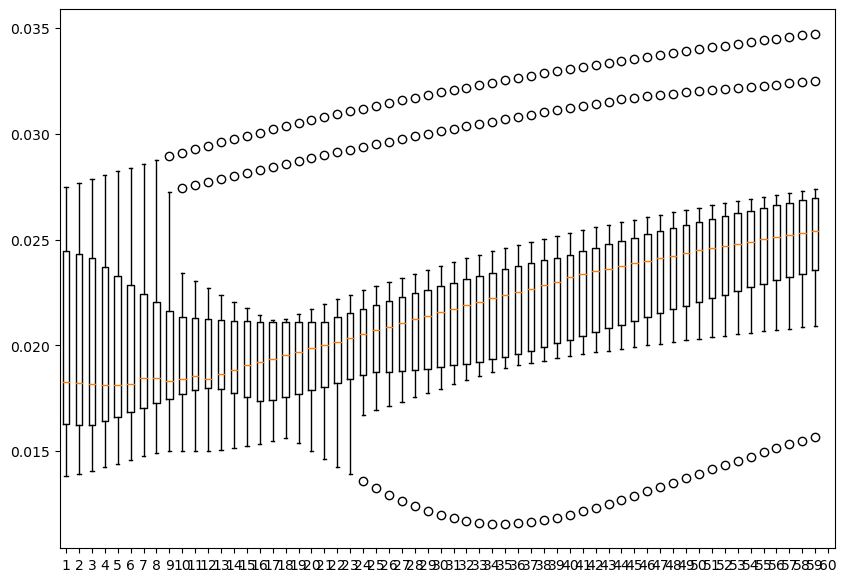

In [52]:
fig = plt.figure(figsize =(10, 7)) #Initializing the size of the figure
 
# Creating plot
plt.boxplot(NRMSE_train)
 
# show plot
plt.show()

With increase in eta value there is a exponential decrease in NRMSE for the training data

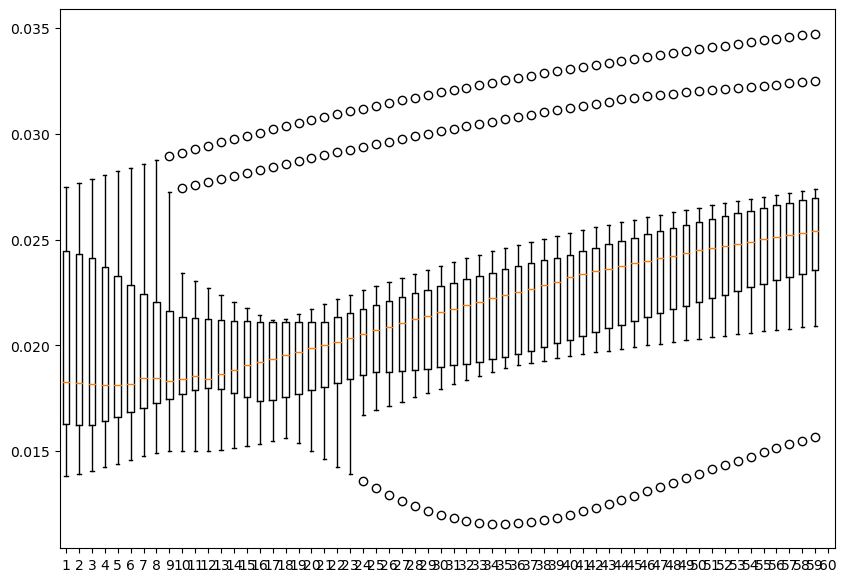

In [53]:
fig = plt.figure(figsize =(10, 7)) #Initializing the size of the figure
 
# Creating plota
plt.boxplot(NRMSE_train)
 
# show plot
plt.show()

We can see that for smaller values eta yields reasonable output but for higher values of eta the system becomes unstable.

In [173]:
## NRMSE for gradient descent with respect to number of training samples 

#Initializing variables 

wt_final = [] 
NRMSE_train = [[]]
t_hat = [[]]
NRMSE_val = [[]]

sample = 100 #Starting sample value
EEta = 0.01

for i in range(12): #Loop over different samples
    seedList = range(11,22) #seed list over which we will be generating values

    
    for seed in seedList: #Loop over different seeds
    
        np.random.seed(seed)#stating a constant random seed

        #Synthesis of data
        q = generate_data_matrix(sample,10)
        wt = generate_data_matrix(10,1)
        w0 = np.zeros((sample, 1))
        t = dependent_column(q,wt,w0)

        #Splitting data into training and validation (70% to 30% ratio for tain and validation respectively)
        q_train, q_val, q_shape = np.split(q, [int(0.7*sample), int(sample)])
        t_train, t_val, t_shape = np.split(t, [int(0.7*sample), int(sample)])

        #estimating weights
        wt_final, MSE_new = est_WeightsLinearRegression(q_train, t_train, EEta, 900, 0.005) #Using linearRegression
        y_hat_new = y_hat_new = linear_regression_est(q_train, wt_final)
        mse_mean = max(y_hat_new) - min(y_hat_new) #Generating value for normalizing RMSE
        NRMSE_new = np.sqrt(MSE_new)/ mse_mean #NRMSE
        
        
        NRMSE_train[i] = np.append(NRMSE_train[i], NRMSE_new) #Appending values for NRMSE_train for different seeds
        
        #Validation of estimates
        y_hat_new = linear_regression_est(q_val, wt_final) #linearRegression estimate on validation data
        mse_mean = max(y_hat_new) - min(y_hat_new) #Generating value for normalizing RMSE
        MSE_new = mse(y_hat_new, t_val) #MSE
        NRMSE_new = np.sqrt(MSE_new)/ mse_mean #NRMSE
        
        
        NRMSE_val[i] = np.append(NRMSE_val[i], NRMSE_new) #Appending values for NRMSE_val for different seeds
        
        
    NRMSE_val.append([]) #Creating a different column for different samples value (Val)   
    NRMSE_train.append([]) #Creating a different column for different samples value (Train)
    sample = sample*2 #Increasing the number of samples on a log_10 scale

Iteration 0 Has been completed with NRMSE as: [0.07615495]
At iteration 44 min_change_NRMSE is achieved
Iteration 0 Has been completed with NRMSE as: [0.06839854]
At iteration 49 min_change_NRMSE is achieved
Iteration 0 Has been completed with NRMSE as: [0.05073603]
At iteration 50 min_change_NRMSE is achieved
Iteration 0 Has been completed with NRMSE as: [0.08110337]
At iteration 47 min_change_NRMSE is achieved
Iteration 0 Has been completed with NRMSE as: [0.05724211]
At iteration 46 min_change_NRMSE is achieved
Iteration 0 Has been completed with NRMSE as: [0.05411919]
At iteration 52 min_change_NRMSE is achieved
Iteration 0 Has been completed with NRMSE as: [0.07695936]
At iteration 48 min_change_NRMSE is achieved
Iteration 0 Has been completed with NRMSE as: [0.06428303]
At iteration 48 min_change_NRMSE is achieved
Iteration 0 Has been completed with NRMSE as: [0.11331309]
At iteration 47 min_change_NRMSE is achieved
Iteration 0 Has been completed with NRMSE as: [0.02371472]
At it

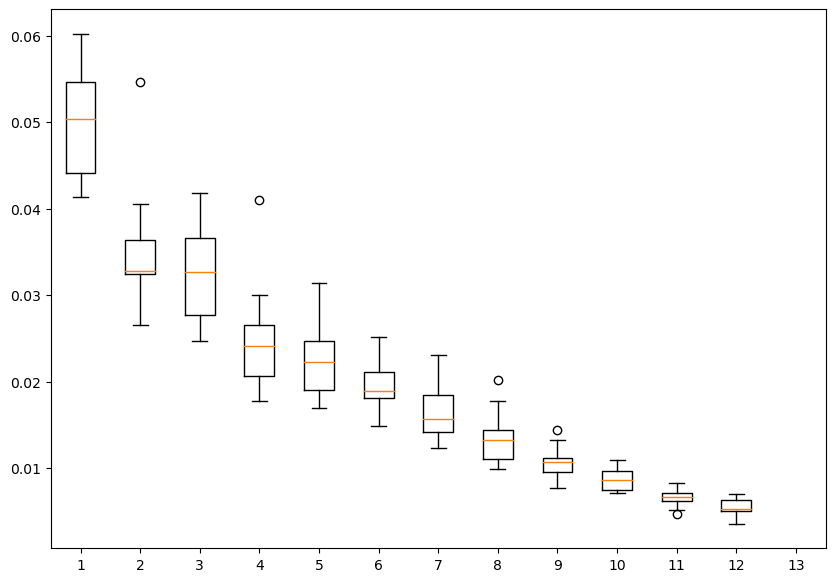

In [174]:
fig = plt.figure(figsize =(10, 7)) #Initializing the size of the figure
 
# Creating plot
plt.boxplot(NRMSE_train)
 
# show plot
plt.show()

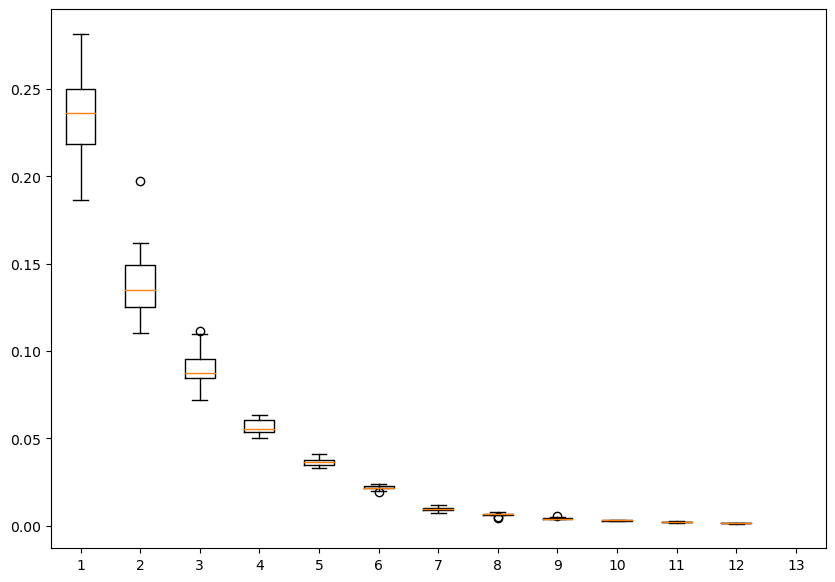

In [175]:
fig = plt.figure(figsize =(10, 7)) #Initializing the size of the figure
 
# Creating plot
plt.boxplot(NRMSE_val)
 
# show plot
plt.show()

With increasing number of samples there is a equivalent decrease in nrmse

In [176]:
## NRMSE for gradient descent with respect to number of features 

#Initializing variables
wt_final = []
NRMSE_train = [[]]
t_hat = [[]]
NRMSE_val = [[]]
i = 0
EEta = 0.01

for variables in range(5, 100, 5): #Loop over different samples
    seedList = range(11,22) #seed list over which we will be generating values

    
    for seed in seedList: #Loop over different seeds
    
        np.random.seed(seed)#stating a constant random seed

        #Synthesis of data
        q = generate_data_matrix(5000,variables)
        wt = generate_data_matrix(variables,1)
        w0 = np.zeros((5000, 1))
        t = dependent_column(q,wt,w0)

        #Splitting data into training and validation (70% to 30% ratio for tain and validation respectively)
        q_train, q_val, q_shape = np.split(q, [int(0.7*5000), int(5000)])
        t_train, t_val, t_shape = np.split(t, [int(0.7*5000), int(5000)])

        #estimating weights
        wt_final, MSE_new = est_WeightsLinearRegression(q_train, t_train, EEta, 150, 0.05) #Using linearRegression
        y_hat_new = y_hat_new = linear_regression_est(q_train, wt_final)
        mse_mean = max(y_hat_new) - min(y_hat_new) #Generating value for normalizing RMSE
        NRMSE_new = np.sqrt(MSE_new)/ mse_mean #NRMSE
        
        NRMSE_train[i] = np.append(NRMSE_train[i], NRMSE_new) #Appending values for NRMSE_train for different seeds
        
        #Validation of estimates
        y_hat_new = linear_regression_est(q_val, wt_final) #linearRegression estimate on validation data
        mse_mean = max(y_hat_new) - min(y_hat_new) #Generating value for normalizing RMSE
        
        MSE_new = mse(y_hat_new, t_val) #MSE
        NRMSE_new = np.sqrt(MSE_new)/ mse_mean #NRMSE
        
        
        NRMSE_val[i] = np.append(NRMSE_val[i], NRMSE_new) #Appending values for NRMSE_val for different seeds
        
        
    NRMSE_val.append([]) #Creating a different column for different samples value (Val)   
    NRMSE_train.append([]) #Creating a different column for different samples value (Train)
    i += 1 #Increasing the number of samples on a log_10 scale

Iteration 0 Has been completed with NRMSE as: [0.00341595]
At iteration 1 min_change_NRMSE is achieved
Iteration 0 Has been completed with NRMSE as: [0.00308853]
At iteration 1 min_change_NRMSE is achieved
Iteration 0 Has been completed with NRMSE as: [0.00346675]
At iteration 1 min_change_NRMSE is achieved
Iteration 0 Has been completed with NRMSE as: [0.01098316]
At iteration 1 min_change_NRMSE is achieved
Iteration 0 Has been completed with NRMSE as: [0.00277914]
At iteration 1 min_change_NRMSE is achieved
Iteration 0 Has been completed with NRMSE as: [0.00263711]
At iteration 1 min_change_NRMSE is achieved
Iteration 0 Has been completed with NRMSE as: [0.00608954]
At iteration 1 min_change_NRMSE is achieved
Iteration 0 Has been completed with NRMSE as: [0.00640114]
At iteration 1 min_change_NRMSE is achieved
Iteration 0 Has been completed with NRMSE as: [0.00247321]
At iteration 1 min_change_NRMSE is achieved
Iteration 0 Has been completed with NRMSE as: [0.00847548]
At iteration 1

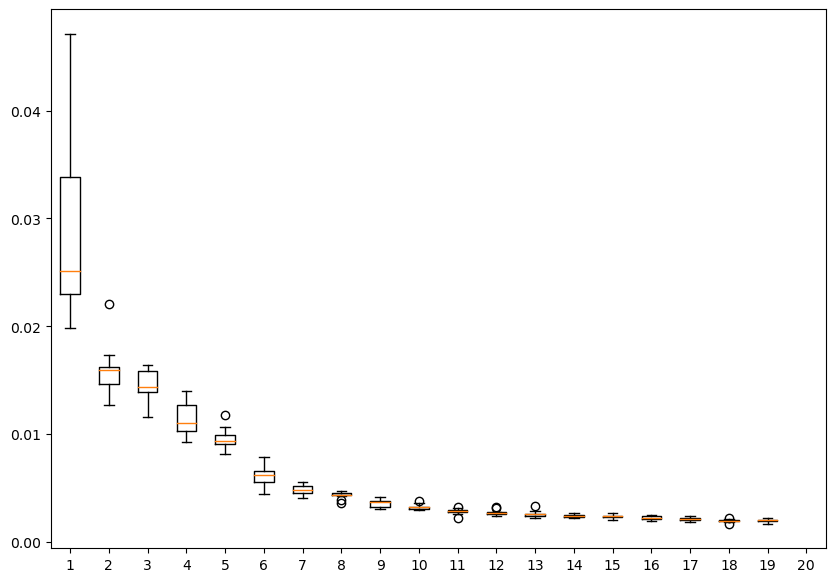

In [177]:
fig = plt.figure(figsize =(10, 7)) #Initializing the size of the figure
 
# Creating plota
plt.boxplot(NRMSE_train)
 
# show plot
plt.show()

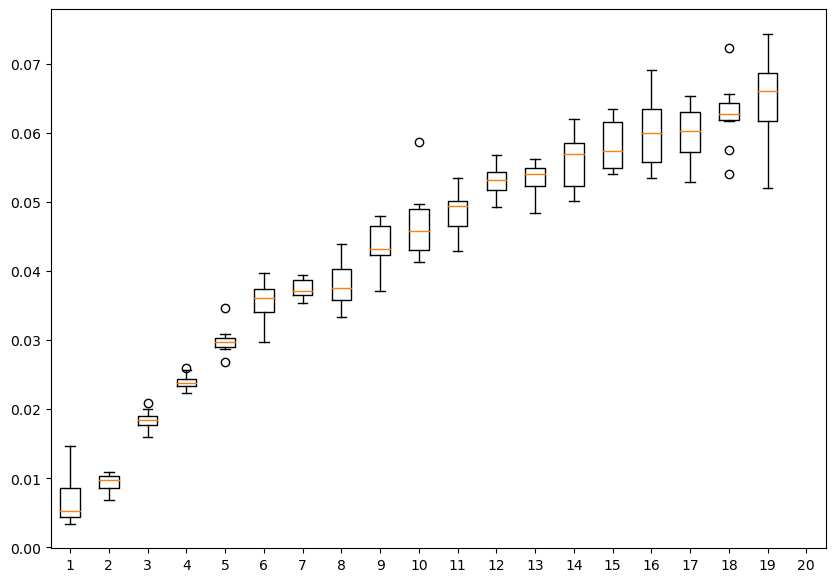

In [178]:
fig = plt.figure(figsize =(10, 7)) #Initializing the size of the figure
 
# Creating plota
plt.boxplot(NRMSE_val)
 
# show plot
plt.show()

With increasing number of for training data there is a decrease in NRMSE while for validation data there is increase in nrmse
This is because with increasing features we get the case of overfitting

In [ ]:
#sample = 65000000
seedList = range(11, 22)
for seed in seedList: #Loop over different seeds
        start = time.time()
        np.random.seed(seed)#stating a constant random seed

        #Synthesis of data
        q = generate_data_matrix(sample,2)
        wt = generate_data_matrix(2,1)
        w0 = np.zeros((sample, 1))
        t = dependent_column(q,wt,w0)

        #estimating weights
        wt_final, MSE_new, y_hat_new = est_WeightsLinearRegression(q, t, 0.1, 150, 0.05)
        
        end = time.time()
        #time_new = end - start
        #Time[i] = np.append(Time[i], time_new)
        print(end - start, "\n\n")

For 65000000 samples our model reaches its breakpoint given that there are 2 features per each sample.

In [54]:
## NRMSE for gradient descent with respect to l2 

#Initializing variables
zero_wt = [[]]
wt_final = []
NRMSE_train = [[]]
t_hat = [[]]
NRMSE_val = [[]]
i = 0
EEta = 0.1

for Lambda2 in range(1, 500, 10): #Loop over different samples
    seedList = range(11,22) #seed list over which we will be generating values

    
    for seed in seedList: #Loop over different seeds
    
        np.random.seed(seed)#stating a constant random seed

        #Synthesis of data
        q = generate_data_matrix(5000, 25)
        wt = generate_data_matrix(25,1)
        w0 = np.zeros((5000, 1))
        t = dependent_column(q,wt,w0)

        #Splitting data into training and validation (70% to 30% ratio for tain and validation respectively)
        q_train, q_val, q_shape = np.split(q, [int(0.7*5000), int(5000)])
        t_train, t_val, t_shape = np.split(t, [int(0.7*5000), int(5000)])

        #estimating weights
        wt_final, MSE_new = est_WeightsLinearRegression(q_train, t_train, EEta, 350, 0.005, Lambda2/100) #Using linearRegression
        y_hat_new = linear_regression_est(q_train, wt_final)
        mse_mean = max(y_hat_new) - min(y_hat_new) #Generating value for normalizing RMSE
        NRMSE_new = np.sqrt(MSE_new)/ mse_mean #NRMSE
        zero_wt[i] = np.append(zero_wt[i], wt_final)
        NRMSE_train[i] = np.append(NRMSE_train[i], NRMSE_new) #Appending values for NRMSE_train for different seeds
        
        #Validation of estimates
        y_hat_new = linear_regression_est(q_val, wt_final) #linearRegression estimate on validation data
        mse_mean = max(y_hat_new) - min(y_hat_new) #Generating value for normalizing RMSE
        
        MSE_new = mse(y_hat_new, t_val) #MSE
        NRMSE_new = np.sqrt(MSE_new)/ mse_mean #NRMSE
        
        
        NRMSE_val[i] = np.append(NRMSE_val[i], NRMSE_new) #Appending values for NRMSE_val for different seeds
        
    zero_wt.append([])
    NRMSE_val.append([]) #Creating a different column for different samples value (Val)   
    NRMSE_train.append([]) #Creating a different column for different samples value (Train)
    i += 1 #Increasing the number of samples on a log_10 scale

Iteration 0 Has been completed with NRMSE as: [0.50942699]
At iteration 4 min_change_NRMSE is achieved
Iteration 0 Has been completed with NRMSE as: [0.55986466]
At iteration 4 min_change_NRMSE is achieved
Iteration 0 Has been completed with NRMSE as: [0.60440864]
At iteration 4 min_change_NRMSE is achieved
Iteration 0 Has been completed with NRMSE as: [0.56693464]
At iteration 4 min_change_NRMSE is achieved
Iteration 0 Has been completed with NRMSE as: [0.61877804]
At iteration 4 min_change_NRMSE is achieved
Iteration 0 Has been completed with NRMSE as: [0.5692801]
At iteration 4 min_change_NRMSE is achieved
Iteration 0 Has been completed with NRMSE as: [0.57902783]
At iteration 4 min_change_NRMSE is achieved
Iteration 0 Has been completed with NRMSE as: [0.53620105]
At iteration 4 min_change_NRMSE is achieved
Iteration 0 Has been completed with NRMSE as: [0.50631207]
At iteration 4 min_change_NRMSE is achieved
Iteration 0 Has been completed with NRMSE as: [0.56558928]
At iteration 4 

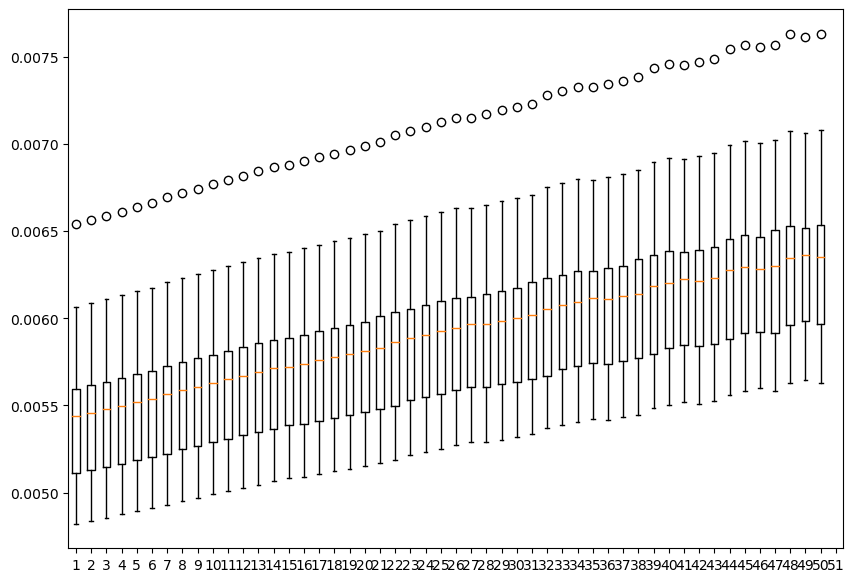

In [55]:
fig = plt.figure(figsize =(10, 7)) #Initializing the size of the figure
 
# Creating plota
plt.boxplot(NRMSE_train)
 
# show plot
plt.show()

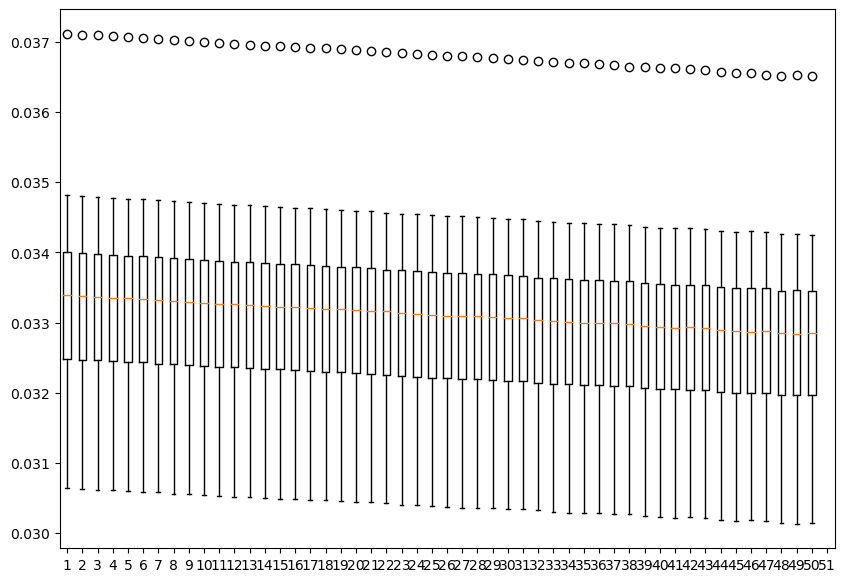

In [56]:
fig = plt.figure(figsize =(10, 7)) #Initializing the size of the figure
 
# Creating plota
plt.boxplot(NRMSE_val)
 
# show plot
plt.show()

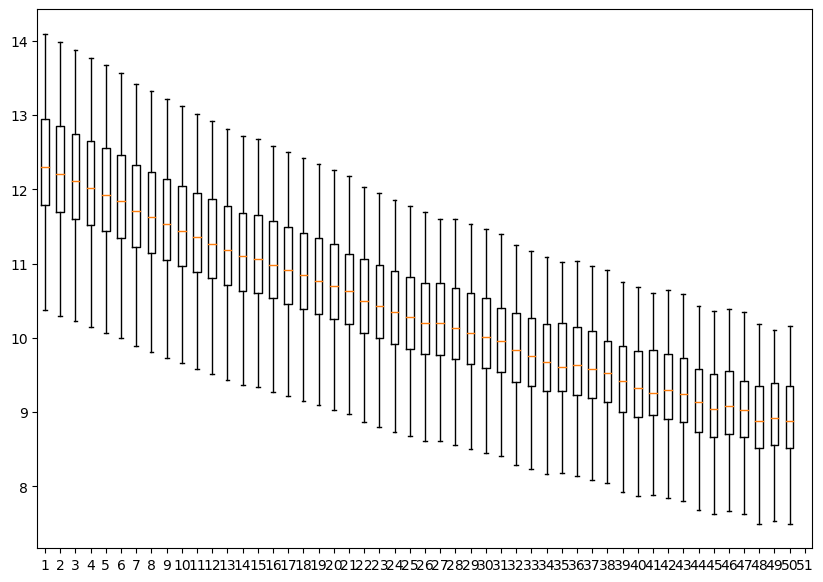

In [57]:
fig = plt.figure(figsize =(10, 7)) #Initializing the size of the figure
 
# Creating plota
plt.boxplot(zero_wt)
 
# show plot
plt.show()

Including regularization (L2) causes training NRMSE to increase with decreasing NRMSE for validation data trend for weight.

In [212]:
## NRMSE for gradient descent with respect to l1

#Initializing variables
zero_wt = [[]]
wt_final = []
NRMSE_train = [[]]
t_hat = [[]]
NRMSE_val = [[]]
i = 0
EEta = 0.01

for Lambda1 in range(10, 50, 5): #Loop over different samples
    seedList = range(11,22) #seed list over which we will be generating values

    
    for seed in seedList: #Loop over different seeds
    
        np.random.seed(seed)#stating a constant random seed

        #Synthesis of data
        q = generate_data_matrix(5000, 25)
        wt = generate_data_matrix(25,1)
        w0 = np.zeros((5000, 1))
        t = dependent_column(q,wt,w0)

        #Splitting data into training and validation (70% to 30% ratio for tain and validation respectively)
        q_train, q_val, q_shape = np.split(q, [int(0.7*5000), int(5000)])
        t_train, t_val, t_shape = np.split(t, [int(0.7*5000), int(5000)])

        #estimating weights
        wt_final, MSE_new = est_WeightsLinearRegression(q_train, t_train, EEta, 300, 0.001, 0, Lambda1) #Using linearRegression
        y_hat_new = linear_regression_est(q_train, wt_final)
        mse_mean = max(y_hat_new) - min(y_hat_new) #Generating value for normalizing RMSE
        NRMSE_new = np.sqrt(MSE_new)/ mse_mean #NRMSE
        
        NRMSE_train[i] = np.append(NRMSE_train[i], NRMSE_new) #Appending values for NRMSE_train for different seeds
        zero_wt[i] = np.append(zero_wt[i], wt_final)        
        #Validation of estimates
        y_hat_new = linear_regression_est(q_val, wt_final) #linearRegression estimate on validation data
        mse_mean = max(y_hat_new) - min(y_hat_new) #Generating value for normalizing RMSE
        
        MSE_new = mse(y_hat_new, t_val) #MSE
        NRMSE_new = np.sqrt(MSE_new)/ mse_mean #NRMSE
        
        
        NRMSE_val[i] = np.append(NRMSE_val[i], NRMSE_new) #Appending values for NRMSE_val for different seeds
        
    zero_wt.append([]) #New zeros wt column
    NRMSE_val.append([]) #Creating a different column for different samples value (Val)   
    NRMSE_train.append([]) #Creating a different column for different samples value (Train)
    i += 1 #Increasing the number of samples on a log_10 scale

Iteration 0 Has been completed with NRMSE as: [0.04668857]
At iteration 30 min_change_NRMSE is achieved
Iteration 0 Has been completed with NRMSE as: [0.05321266]
At iteration 30 min_change_NRMSE is achieved
Iteration 0 Has been completed with NRMSE as: [0.05783967]
Iteration 30 Has been completed with NRMSE as: [0.46038779]
At iteration 31 min_change_NRMSE is achieved
Iteration 0 Has been completed with NRMSE as: [0.05460991]
At iteration 30 min_change_NRMSE is achieved
Iteration 0 Has been completed with NRMSE as: [0.05511981]
Iteration 30 Has been completed with NRMSE as: [0.47097927]
At iteration 31 min_change_NRMSE is achieved
Iteration 0 Has been completed with NRMSE as: [0.05490216]
Iteration 30 Has been completed with NRMSE as: [0.4329899]
At iteration 31 min_change_NRMSE is achieved
Iteration 0 Has been completed with NRMSE as: [0.05319772]
Iteration 30 Has been completed with NRMSE as: [0.44299187]
At iteration 31 min_change_NRMSE is achieved
Iteration 0 Has been completed wi

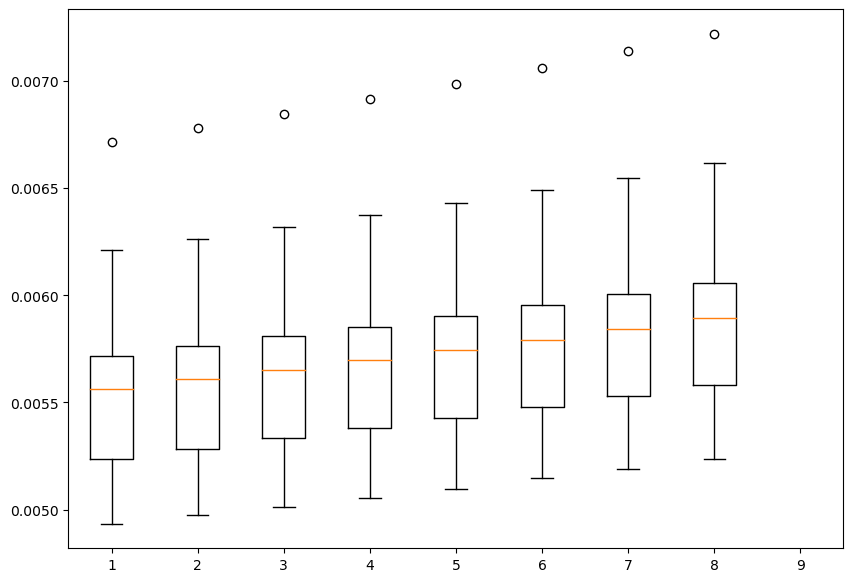

In [213]:
fig = plt.figure(figsize =(10, 7)) #Initializing the size of the figure
 
# Creating plota
plt.boxplot(NRMSE_train)
 
# show plot
plt.show()

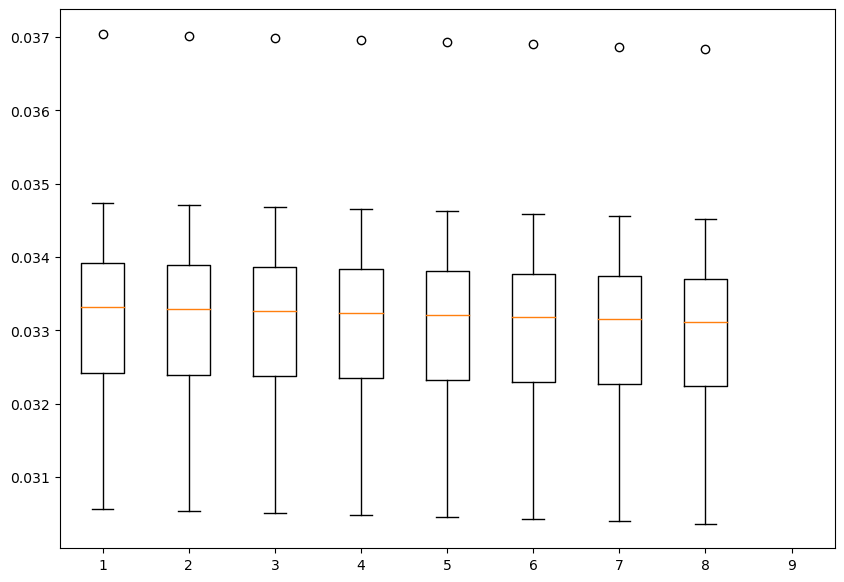

In [214]:
fig = plt.figure(figsize =(10, 7)) #Initializing the size of the figure
 
# Creating plota
plt.boxplot(NRMSE_val)
 
# show plot
plt.show()


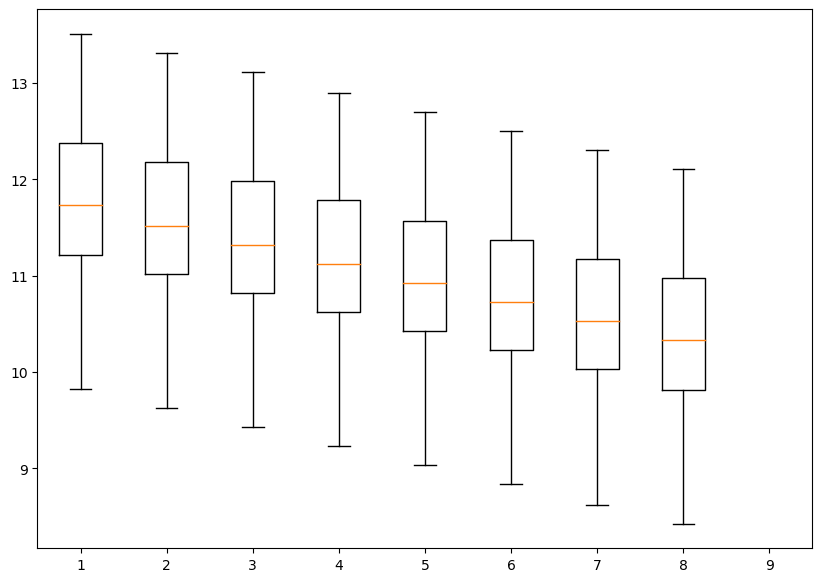

In [215]:
fig = plt.figure(figsize =(10, 7)) #Initializing the size of the figure
 
# Creating plota
plt.boxplot(zero_wt)
 
# show plot
plt.show()


Similar trend as above

In [185]:
##Now with noise for Lambda 2

#Initializing variables
wt_final = []
NRMSE_train = [[]]
t_hat = [[]]
NRMSE_val = [[]]
i = 0
EEta = 0.009
Noise = 0.1


for Lambda2 in range(1, 240, 5): #Loop over different samples
    seedList = range(11,22) #seed list over which we will be generating values

    
    for seed in seedList: #Loop over different seeds
    
        np.random.seed(seed)#stating a constant random seed

        #Synthesis of data
        q = generate_data_matrix(5000, 25)
        wt = generate_data_matrix(25,1)
        w0 = np.zeros((5000, 1))
        t = dependent_column(q,wt,w0, Noise)

        #Splitting data into training and validation (70% to 30% ratio for tain and validation respectively)
        q_train, q_val, q_shape = np.split(q, [int(0.7*5000), int(5000)])
        t_train, t_val, t_shape = np.split(t, [int(0.7*5000), int(5000)])

        #estimating weights
        wt_final, MSE_new = est_WeightsLinearRegression(q_train, t_train, EEta, 350, 0.005, Lambda2/100) #Using linearRegression
        y_hat_new = linear_regression_est(q_train, wt_final)
        mse_mean = max(y_hat_new) - min(y_hat_new) #Generating value for normalizing RMSE
        NRMSE_new = np.sqrt(MSE_new)/ mse_mean #NRMSE
        
        NRMSE_train[i] = np.append(NRMSE_train[i], NRMSE_new) #Appending values for NRMSE_train for different seeds
        
        #Validation of estimates
        y_hat_new = linear_regression_est(q_val, wt_final) #linearRegression estimate on validation data
        mse_mean = max(y_hat_new) - min(y_hat_new) #Generating value for normalizing RMSE
        
        MSE_new = mse(y_hat_new, t_val) #MSE
        NRMSE_new = np.sqrt(MSE_new)/ mse_mean #NRMSE
        
        
        NRMSE_val[i] = np.append(NRMSE_val[i], NRMSE_new) #Appending values for NRMSE_val for different seeds
        
        
    NRMSE_val.append([]) #Creating a different column for different samples value (Val)   
    NRMSE_train.append([]) #Creating a different column for different samples value (Train)
    i += 1 #Increasing the number of samples on a log_10 scale

Iteration 0 Has been completed with NRMSE as: [0.04436364]
At iteration 19 min_change_NRMSE is achieved
Iteration 0 Has been completed with NRMSE as: [0.04928984]
At iteration 20 min_change_NRMSE is achieved
Iteration 0 Has been completed with NRMSE as: [0.05379521]
At iteration 21 min_change_NRMSE is achieved
Iteration 0 Has been completed with NRMSE as: [0.05095852]
At iteration 20 min_change_NRMSE is achieved
Iteration 0 Has been completed with NRMSE as: [0.05063863]
At iteration 21 min_change_NRMSE is achieved
Iteration 0 Has been completed with NRMSE as: [0.05180556]
At iteration 20 min_change_NRMSE is achieved
Iteration 0 Has been completed with NRMSE as: [0.04858382]
At iteration 20 min_change_NRMSE is achieved
Iteration 0 Has been completed with NRMSE as: [0.04751594]
At iteration 20 min_change_NRMSE is achieved
Iteration 0 Has been completed with NRMSE as: [0.04548443]
At iteration 19 min_change_NRMSE is achieved
Iteration 0 Has been completed with NRMSE as: [0.05249376]
At it

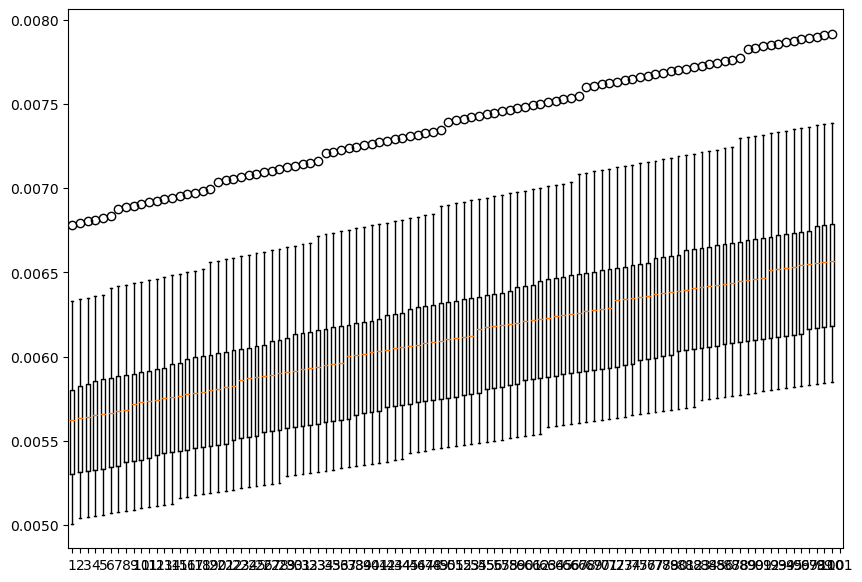

In [186]:
fig = plt.figure(figsize =(10, 7)) #Initializing the size of the figure
 
# Creating plota
plt.boxplot(NRMSE_train)
 
# show plot
plt.show()

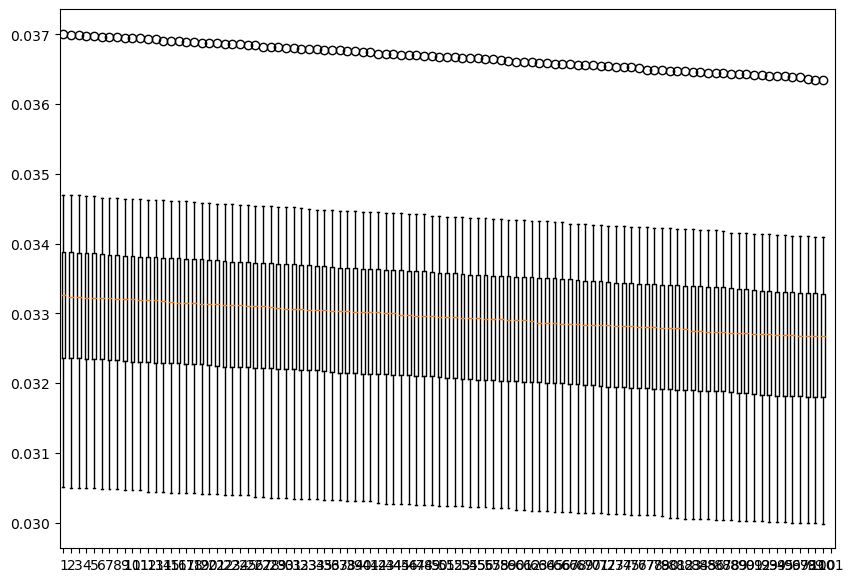

In [187]:
fig = plt.figure(figsize =(10, 7)) #Initializing the size of the figure
 
# Creating plota
plt.boxplot(NRMSE_val)
 
# show plot
plt.show()

We can see that even with noise there is a steady decrease in validation data while nrmse increases 
for training data as seen before.

Hence, we can say that when data contains noise its advisable to use L2 regularization.

In [188]:
##Now with noise for Lambda 1

#Initializing variables
wt_final = []
NRMSE_train = [[]]
t_hat = [[]]
NRMSE_val = [[]]
i = 0
EEta = 0.01
Noise = 0.1

for Lambda1 in range(-15, 60, 1): #Loop over different samples
    seedList = range(11,22) #seed list over which we will be generating values

    
    for seed in seedList: #Loop over different seeds
    
        np.random.seed(seed)#stating a constant random seed

        #Synthesis of data
        q = generate_data_matrix(5000, 25)
        wt = generate_data_matrix(25,1)
        w0 = np.zeros((5000, 1))
        t = dependent_column(q,wt,w0, Noise)

        #Splitting data into training and validation (70% to 30% ratio for tain and validation respectively)
        q_train, q_val, q_shape = np.split(q, [int(0.7*5000), int(5000)])
        t_train, t_val, t_shape = np.split(t, [int(0.7*5000), int(5000)])

        #estimating weights
        wt_final, MSE_new = est_WeightsLinearRegression(q_train, t_train, EEta, 350, 0.001, 0, Lambda1) #Using linearRegression
        y_hat_new = linear_regression_est(q_train, wt_final)
        mse_mean = max(y_hat_new) - min(y_hat_new) #Generating value for normalizing RMSE
        NRMSE_new = np.sqrt(MSE_new)/ mse_mean #NRMSE
        
        NRMSE_train[i] = np.append(NRMSE_train[i], NRMSE_new) #Appending values for NRMSE_train for different seeds
        
        #Validation of estimates
        y_hat_new = linear_regression_est(q_val, wt_final) #linearRegression estimate on validation data
        mse_mean = max(y_hat_new) - min(y_hat_new) #Generating value for normalizing RMSE
        
        MSE_new = mse(y_hat_new, t_val) #MSE
        NRMSE_new = np.sqrt(MSE_new)/ mse_mean #NRMSE
        
        
        NRMSE_val[i] = np.append(NRMSE_val[i], NRMSE_new) #Appending values for NRMSE_val for different seeds
        
        
    NRMSE_val.append([]) #Creating a different column for different samples value (Val)   
    NRMSE_train.append([]) #Creating a different column for different samples value (Train)
    i += 1 #Increasing the number of samples on a log_10 scale

Iteration 0 Has been completed with NRMSE as: [0.05248497]
At iteration 31 min_change_NRMSE is achieved
Iteration 0 Has been completed with NRMSE as: [0.05761818]
At iteration 31 min_change_NRMSE is achieved
Iteration 0 Has been completed with NRMSE as: [0.06277395]
At iteration 32 min_change_NRMSE is achieved
Iteration 0 Has been completed with NRMSE as: [0.05957071]
At iteration 31 min_change_NRMSE is achieved
Iteration 0 Has been completed with NRMSE as: [0.05982045]
At iteration 32 min_change_NRMSE is achieved
Iteration 0 Has been completed with NRMSE as: [0.06050704]
At iteration 31 min_change_NRMSE is achieved
Iteration 0 Has been completed with NRMSE as: [0.05689182]
At iteration 31 min_change_NRMSE is achieved
Iteration 0 Has been completed with NRMSE as: [0.05558128]
At iteration 31 min_change_NRMSE is achieved
Iteration 0 Has been completed with NRMSE as: [0.05314358]
At iteration 30 min_change_NRMSE is achieved
Iteration 0 Has been completed with NRMSE as: [0.06156351]
At it

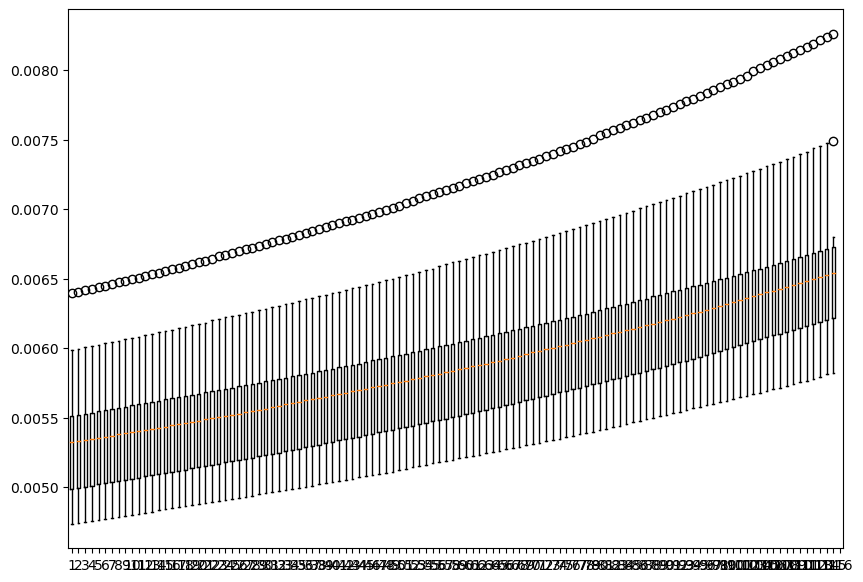

In [189]:
fig = plt.figure(figsize =(10, 7)) #Initializing the size of the figure
 
# Creating plota
plt.boxplot(NRMSE_train)
 
# show plot
plt.show()

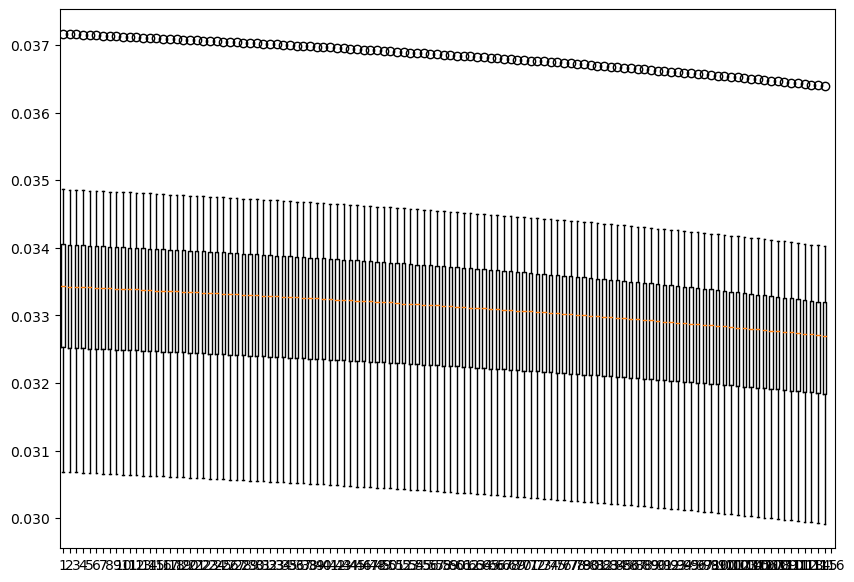

In [190]:
fig = plt.figure(figsize =(10, 7)) #Initializing the size of the figure
 
# Creating plota
plt.boxplot(NRMSE_val)
 
# show plot
plt.show()

A similar trend is seen for l1 regularization with noise involved.
Therefore it could be said that using both of them together is the way to go!





The main focus of this assigment was on understanding how a linear regression model works.

Along with how it is dependent on each parameters for different ways of calculating estimates 
being PsuedoInverse Linear Regression and Gradient descent linear regression. 

Along with these main motives I also got to know of the nitty gritty of how a ML model is trained and how frustrating it can be
at times. Meanwhile the satisfaction of solving those bugs is also immeasurable. Also, a big part of this assignment for
me was handling all the dimensions correctly and which function to use at which ocassion.

Eliminating the usage of for loops was also another aspect I was focusing on during the assignment. Which was very tidious to do. Since, it forced me to look for alternatives for every implementation that I was trying to do. While, it was tidious it was also gave me a nice exposure to numpy libraries and other coding practices.


I used many online references in this assignment:
- https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html # This was used to understand all the numpy functions used
- https://math.stackexchange.com/questions/2692200/how-does-l-1-regularization-present-itself-in-gradient-descent # I used math.stackexchange to clear any questions I had regarding the algorithms implimented
- https://www.geeksforgeeks.org/implementation-of-ridge-regression-from-scratch-using-python/ # From time to time I would look up the functions that I want to implement on geeks for geeks and mold these examples to my satisfaction
- https://towardsdatascience.com/linear-regression-model-with-numpy-7d270feaca63 # Near the starting of the assignment I found this site to be very helpful as it gave me the starting matter to work and build up on

As for peer share I asked a few of my friends who haven't taken this course as they already have done courses related to ML before:
- Prateek Garg, Roll_No - 20D070060 - Helped me understanding the psuedo inverse matrix and how it works
- Bhavya Kohli, Roll_No - 20D070021 - Helped me fix a few dimension problem I had in linearRegression_est function
- Bhavya Singh, Roll_No - 200040036 - Helped me to get a feel of how lambda and eta work and what values to use in the model